<a href="https://colab.research.google.com/github/AndreaBV00/Entrega_Final_Coder_DS_49150/blob/main/Proyecto_Final_DS_Comision_49150_Andrea_Brito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO DATASCIENCE: Cancelaciones en Reservas Hoteleras**


*CODERHOUSE*

*Comisión: 49150*

*Andrea Brito*

hotel-encabezado-tipografico-viajes-planificacion-turistica-reserva-apartamento_277904-12728.avif



#1-**OBJETIVO DEL PROYECTO**
En este proyecto nos vamos a centrar en el análisis de los datos de las Reservas Hoteleras y los factores que influyen en las cancelaciones. Debido al cambio en la forma de reservar (se hace mayormente online), y que en muchos casos las cancelaciones no tienen costo o tienen un costo bajo, el número de cancelaciones se ha incrementado de forma exponencial.
Origen de los datos: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset










##**1.a- Contexto y Objetivo comercial del proyecto**

Dadas las características que tiene este dataset y la información que nos ofrece, podemos decir que el análsis del mismo puede ayudar a los establecimientos a ver qué factores inciden en mayor medida en las cancelaciones, para así en estos casos minimizar las pérdidas. En el caso de los establecimientos Hoteleros, una habitación vacía significa una pérdida, ya que rara vez se pueden bajar los costos; y menos cuando los mismos no se deben a cambios sustanciales en las reservas sino a cancelaciones que muchas veces se hacen a último momento.
Si logramos aislar las variables que inciden en mayor medida en las cancelaciones, le damos al interesado la posibilidad de idear planes para minimizar las mismas, y, en el caso de que estas se produzcan, poder tener ya herramientas para rentabilizar la cancelación de las reservas.





##**1.b- Contexto analítico**

Utilizando las variables contenidas en el Dataset vamos a intentar dar respuesta a las preguntas e Hipótesis planteadas mas abajo.





##**1.c- Preguntas a responder**

- ¿Qué factores inciden de forma directa en las cancelaciones?
- ¿En qué indicador está el mayor riesgo de cancelación?
- ¿Los clientes que vienen con niños tienen mayor o menor ínidce de cancelación?




##**1.d- HIPÓTESIS**

- **A**
  - *H0*: El tiempo de antelación en que se realiza la reserva influye de manera directa en la cancelación de la misma.
  - *H1*: El tiempo de antelación el que se realiza la reserva no influye de manera directa en la cancelación de la misma.
- **B**
  - *H0*: Según el tipo de habitación seleccionada, las reservas son canceladas en mayor o menor medida.
  - *H1*: Según el tipo de habitación seleccionada, las reservas no son canceladas en mayor o menor medida.
- **C**
  - *H0*: El segmento de mercado influye de manera directa en la cancelación de las reservas.
  - *H1*: El segmento de mercado no influye de manera directa en la cancelación de las reseras.
- **D**
  - *H0*: Según el tipo de plan de comidas seleccionado, las reservas son canceladas en mayor o menor medida.
  - *H1*: Según el tipo de plan de comidas seleccionado, las reservas no son canceladas en mayor o menor medida.
- **E**
  - *H0*: Si hay cancelaciones previas, las nuevas cancelaciones son más factibles.
  - *H1*: Si no hay cancelaciones previas, las nuevas cancelaciones son menos factibles.

# 2-**DESCRIPCIÓN DE VARIABLES**

- `Booking_ID`: identificador único de cada reserva

- `no_of_adults`: número de adultos

- `no_of_children`: número de niños

- `no_of_weekend_nights`: cantidad de noches de fin de semana de la reserva
- `no_of_week_nights`: cantidad de noches de semana de la reserva

- `type_of_meal_plan`: tipo de plan de comidas

- `required_car_parking_space`: si necesita o no lugar de estacionamiento

- `room_type_reserved`: tipo de habitación reservada

- `lead_time`: días de antelación con los que se hizo la reserva

- `arrival_year`: año de llegada

- `arrival_month`: mes de llegada

- `arrival_date`: día de llegada

- `market_segment_type`: tipo de segmento de mercado

- `repeated_guest`: si el huésped es repetido o nuevo

- `no_of_previous_cancelations`: cantidad de reservas canceladas previamente

- `no_of_previous_bookings_not_canceled`: cantidad de reservas no canceladas previamente

- `avg_price_per_room`: precio pormedio por habitación

- `no_of_special_requests`: cantidad de pedidos especiales hechos por los huéspedes

- `booking_status`: indica si la reserva fue cancelada o no

In [ ]:
!pip install tabulate

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

In [ ]:
!pip install tensorflow

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import random
import os
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import scipy

# Gráficos y Tablas
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tabulate import tabulate

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Feature Engineering
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import PolynomialFeatures
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import LeaveOneOut, KFold, StratifiedKFold, cross_val_score

# Reducción de dimensionalidad
from sklearn.decomposition import PCA

# Detección de outliers
from sklearn.ensemble import IsolationForest

# Modelos de Regresión
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Modelos de Clasificación
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

# Modelos de Redes Neuronales
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.random import set_seed
from tensorflow.keras.initializers import RandomNormal, Constant


#Desbalanceo de Clases
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier

# Selección de Modelos
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from scipy.stats import randint

# Métricas
# ==============================================================================
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import json

Importamos librerías necesarias.

In [ ]:
# Monto a Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Leo el archivo
ruta_CSV = '/content/gdrive/MyDrive/Data_Science_Entregas/Hotel Reservations.csv' #creamos una variable con la ruta del archivo
df_hotel = pd.read_csv(ruta_CSV, sep = ",") #leemos el archivo CSV

In [ ]:
# Copiamos el dataset para no alterar el original
df_copia = df_hotel.copy()

In [ ]:
# Vemos la información general del dataset
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Vemos la cantidad de columnas
df_copia.shape[1]

19

In [ ]:
# Vemos la cantidad de filas
df_copia.shape[0]

36275

In [ ]:
# Vemos la cantidad de nulos
df_copia.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
# Vemos el la primera parte del dataset
df_copia.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# Vemos principales medidas estadisticas
df_copia.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


# 3-**EDA** (Análisis exploratorio de los datos)
En este caso vamos a encarar el análisis de los datos de la siguiente forma:
- **Tendencias de reservas en el tiempo**: Vamos a examinar la distribución  de las reservas a través de los diferentes meses y años para identificar temporadas de alta y baja demanda.
- **Composición demográfica de los clientes**: Aquí veremos la composición de adultos y niños de las reservas.
- **Tipo de habitación seleccionada**: Aquí veremos, en el total de reservas, cómo se distribuyen las mismas de acuerdo al tipo de habitación.
- **Tipo de plan de comidas seleccionado**: Aquí veremos, en el total de reservas, cómo se distribuyen las mismas de acuerdo al tipo de plan de comidas.
- **Segmento de mercado**: Aquí veremos, en el total de reservas, cómo se distribuyen las mismas de acuerdo al segmento de mercado.

- **CANCELACIONES**: En este apartado analizaremos lo siguiente:
    - **Conteo y tasa de cancelaciones**: Además de graficar, vamos a averiguar el porcentaje de cancelaciones que se dan en el dataset.
    - **Cancelaciones y Lead Time**: vamos a graficar para ver si, a simple vista, podemos establecer una relación entre estas variables.
    - **Tipo de Plan de comidas y cancelaciones**: intentaremos observar si existe una relación entre el tipo de plan de comidas y el status de la reserva.
    - **Tipo de habitación y cancelaciones**: intentaremos observar si existe una relación entre el tipo de habitación y el status de la reserva.
    - **Segmento de mercado y cancelaciones**: intentaremos observar si existe una relación entre el segmento de mercado y el status de la reserva.
    - **Número de cancelaciones previas  y cancelaciones para huéspedes que repiten reserva**: intentaremos observar si existe una relación entre los clientes que han cancelado reservas y los que no lo han hecho.

##3.a- Tendencias de reservas en el Tiempo

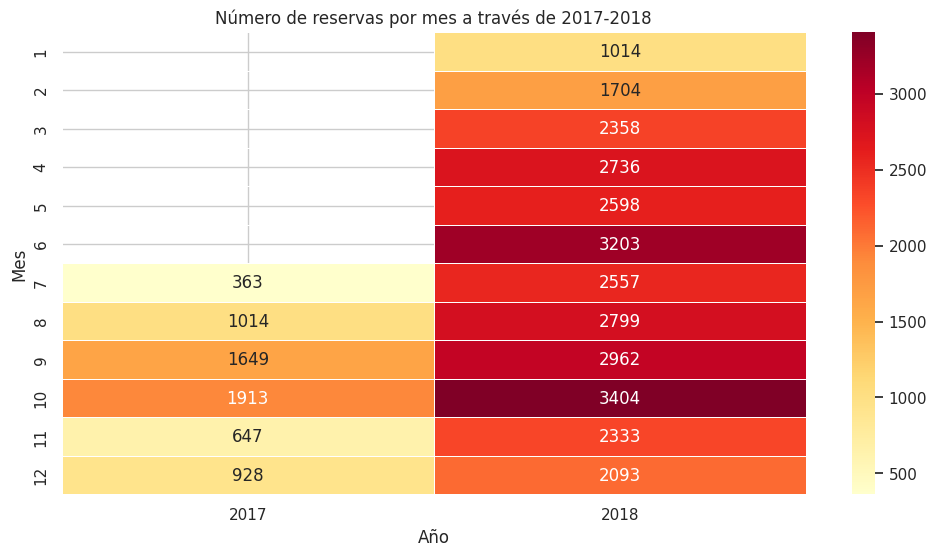

In [ ]:
# Creo la estética del gráfico
sns.set(style="whitegrid")

# Agrupo por fecha y mes de llegada para ver la distribución
booking_trends = df_copia.groupby(['arrival_year', 'arrival_month']).size().reset_index(name='number_bookings')

# Creo la tabla pivot para ver mejor el análisis
booking_trends_pivot = booking_trends.pivot(index="arrival_month", columns="arrival_year", values="number_bookings")

# Ajusto el formato para el Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(booking_trends_pivot, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=.5)
plt.title('Número de reservas por mes a través de 2017-2018')
plt.ylabel('Mes')
plt.xlabel('Año')
plt.show()

Con esta Pivot Table vemos que tenemos datos a partir de julio de 2017 hasta diciembre de 2018. Podemos observar, además, cuándo hay picos de ocupación y cuándo hay baja ocupación.

## 3.b- Composición demográfica de los  clientes

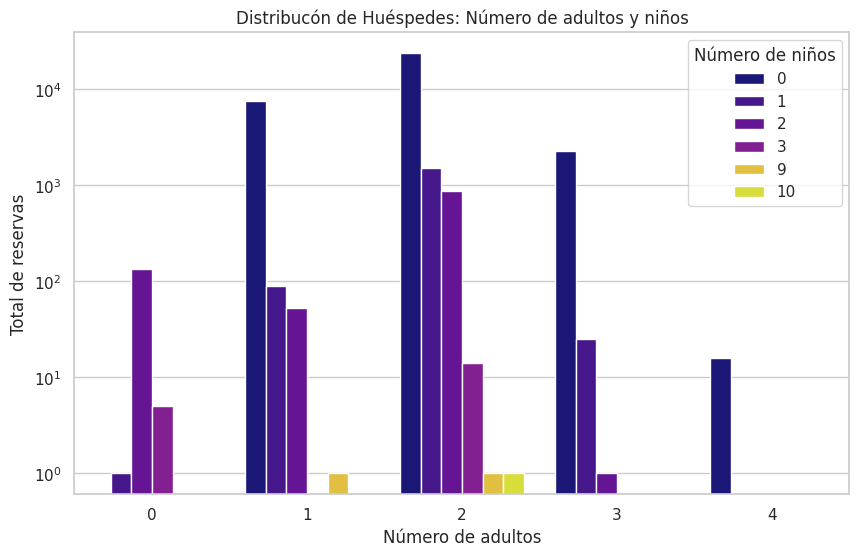

In [ ]:
# Distribución adultos/niños

dist_huesped = df_copia.groupby(['no_of_adults', 'no_of_children']).size().reset_index(name='number_bookings')

# Graficos de distribución de huéspedes
plt.figure(figsize=(10, 6))
sns.barplot(x='no_of_adults', y='number_bookings',  palette='plasma', hue='no_of_children', data=dist_huesped)

plt.title('Distribucón de Huéspedes: Número de adultos y niños')
plt.xlabel('Número de adultos')
plt.ylabel('Total de reservas')
plt.yscale('log') # agregamos para que sea más visible el gráfico
plt.legend(title='Número de niños', loc="upper right")
plt.show()

Con este gráfico de barras vemos que en la mayoría de las reservas hay 2 adultos sin niños, y que en la mayoría de los casos en los que las reservas son con niños hay un máximo de 2 niños.

##3.c- Tipo de habitación seleccionada

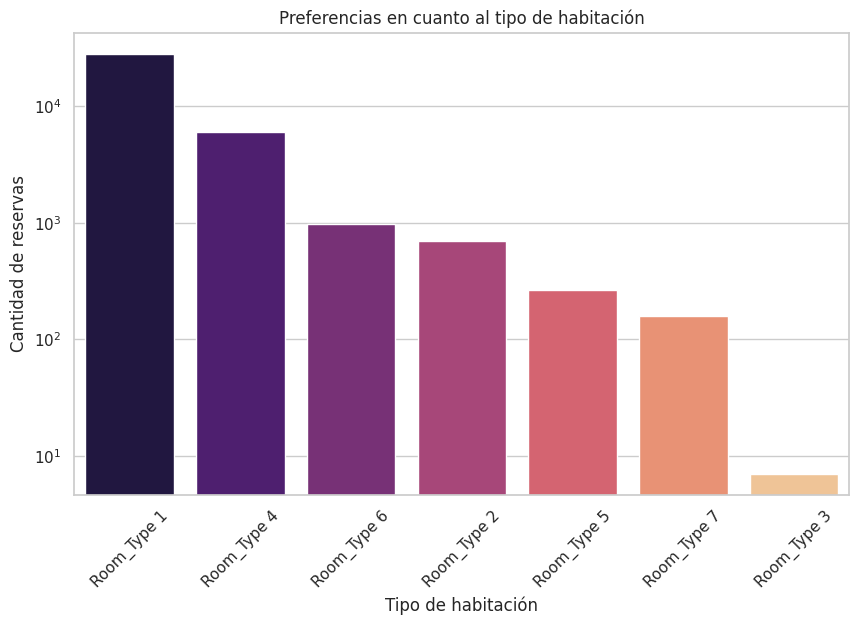

In [ ]:
# Analizamos tipos de habitación
tipo_habitacion = df_copia['room_type_reserved'].value_counts()

# Plotting the room type preferences
plt.figure(figsize=(10, 6))
sns.barplot(x=tipo_habitacion.index, y=tipo_habitacion.values, legend=False, hue=tipo_habitacion.index, palette='magma')
plt.title('Preferencias en cuanto al tipo de habitación')
plt.xlabel('Tipo de habitación')
plt.ylabel('Cantidad de reservas')
plt.yscale('log')  # agregamos para que sea más visible el gráfico
plt.xticks(rotation=45)
plt.show()

Este gráfco nos muestra la distribución de los huéspedes de acuerdo al tipo de habitación seleccionada.

##3.d- Tipo de plan de comidas seleccionado

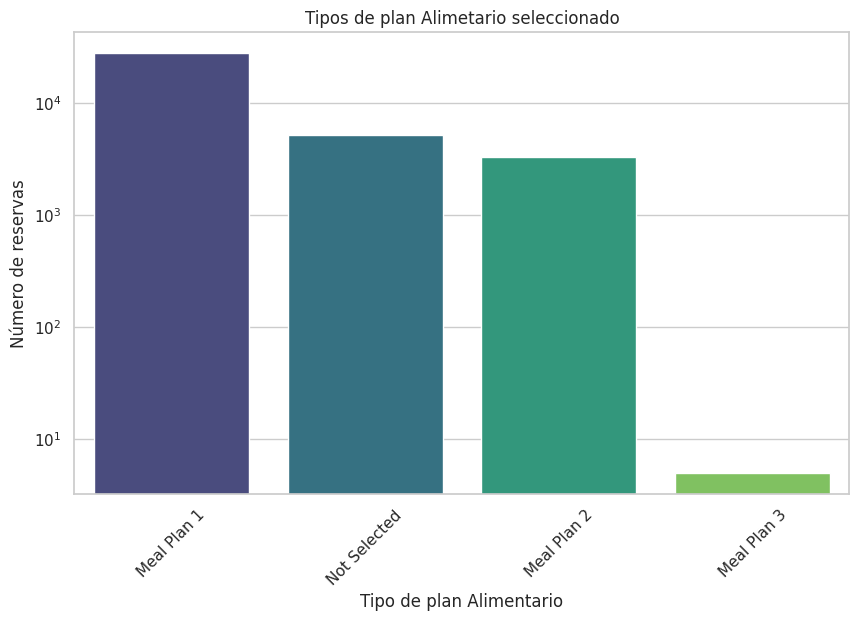

In [ ]:
# Tipos de Plan de comidas

comida_pref = df_copia['type_of_meal_plan'].value_counts()

# Graficamos tipos de plan de comidas

plt.figure(figsize=(10, 6))
sns.barplot(x=comida_pref.index, y=comida_pref.values, legend=False, hue=comida_pref.index, palette='viridis')
plt.title('Tipos de plan Alimetario seleccionado')
plt.xlabel('Tipo de plan Alimentario')
plt.ylabel('Número de reservas')
plt.yscale('log')  # agregamos para que sea más visible el gráfico
plt.xticks(rotation=45)
plt.show()

Este gráfco nos muestra la distribución de los huéspedes de acuerdo al tipo de plan de comidas seleccionado.

##3.e- Segmento de mercado

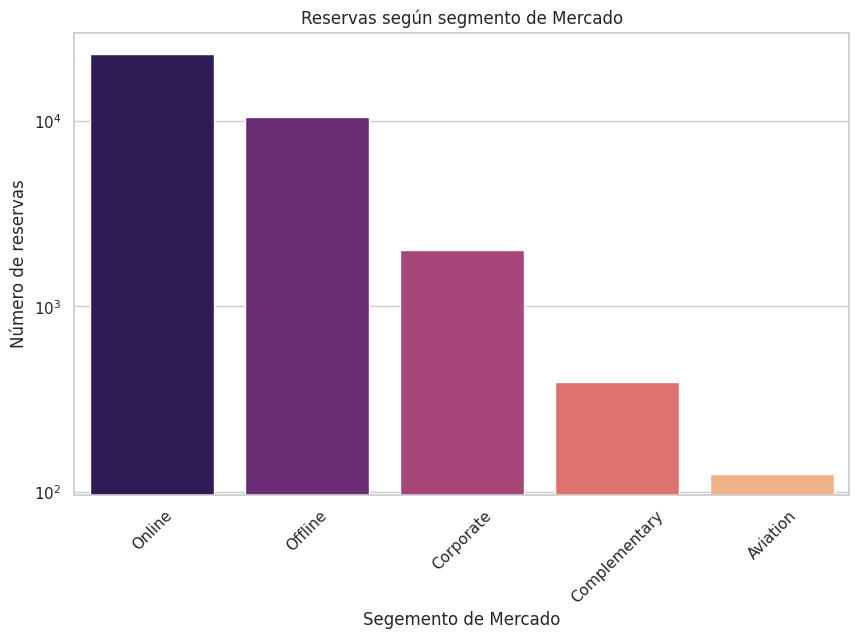

In [ ]:
# Segmentos de mercado

seg_mercado = df_copia['market_segment_type'].value_counts()

# Graficamos segmentos de mercado

plt.figure(figsize=(10, 6))
sns.barplot(x=seg_mercado.index, y=seg_mercado.values, legend=False, hue=seg_mercado.index, palette='magma')
plt.title('Reservas según segmento de Mercado')
plt.xlabel('Segemento de Mercado')
plt.ylabel('Número de reservas')
plt.yscale('log')  #  agregamos para que sea más visible el gráfico
plt.xticks(rotation=45)
plt.show()

Este gráfco nos muestra la distribución de los huéspedes de acuerdo al segmento de mercado al que pertenece la reserva.

## 3.f- Cancelaciones


In [ ]:
## DEFINICIÓN DE VARIABLES (dado que nos vamos a centrar en tema cancelaciones, definimos variables para ahorrar código)

# Filtramos reservas y dividimos entre canceladas y no canceladas

res_cancelada = df_copia[df_copia['booking_status'] == 'Canceled']
res_no_cancelada = df_copia[df_copia['booking_status'] == 'Not_Canceled']

# Filtramos reservas y dividimos entre canceladas y no canceladas con y sin niños

canceladas_children = df_copia[(df_copia['no_of_children'] >= 1) & (df_copia['booking_status'] == 'Canceled' )]
canceladas_sin_children = df_copia[(df_copia['no_of_children'] == 0) & (df_copia['booking_status'] == 'Canceled' )]
res_children = df_copia[(df_copia['no_of_children'] >= 1)]
res_sin_children = df_copia[(df_copia['no_of_children'] == 0)]

#Contar cancelados repetidos
cancelados_repetidos = df_copia[(df_copia['repeated_guest'] == 1) & (df_copia['no_of_previous_cancellations'] >= 1) & (df_copia['booking_status'] == 'Canceled' )]
no_cancelados_repetidos = df_copia[(df_hotel['repeated_guest'] == 1) & (df_copia['no_of_previous_bookings_not_canceled'] >= 1) & (df_copia['booking_status'] == 'Canceled' )]

### 3.f.i- Tasa de cancelación y conteo de reservas canceladas y no canceladas

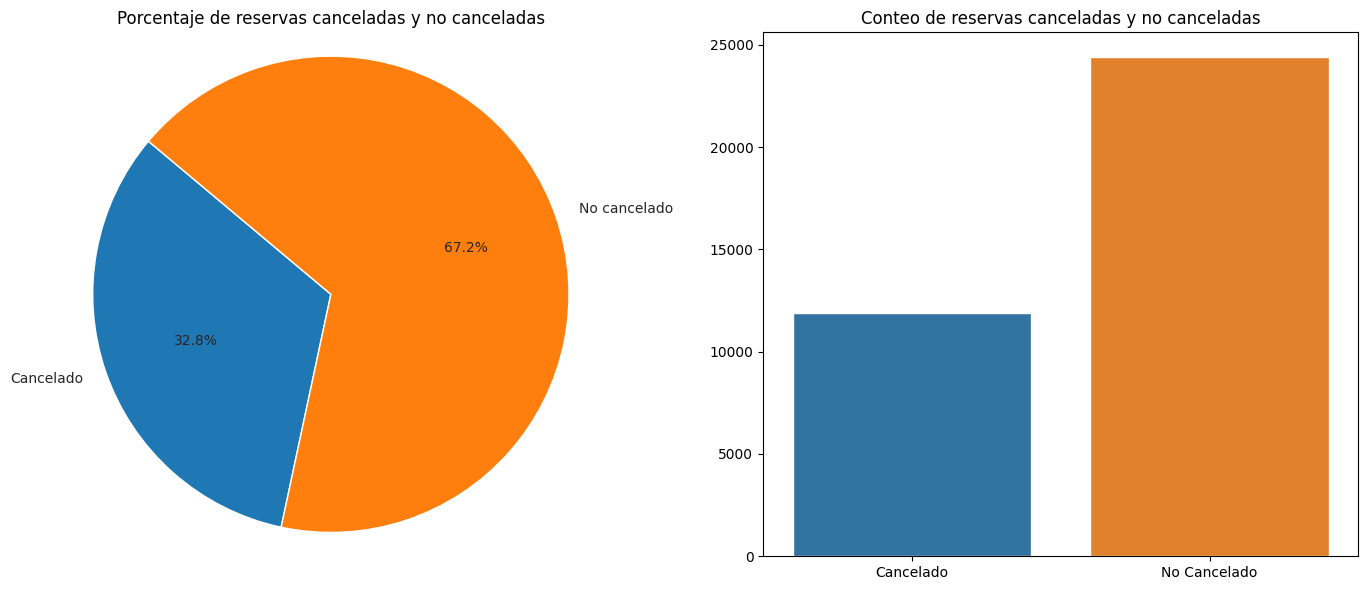

In [ ]:
# Calcular tasa de cancelación

res_totales = len(df_copia)
tot_res_can = len(res_cancelada)
tot_res_no_can = len(res_no_cancelada)

# Graficando cancelaciones porcentajes y conteo en el mismo espacio
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.set_style("whitegrid")

# Gráfico 1
labels = ['Cancelado', 'No cancelado']
sizes = [tot_res_can, tot_res_no_can]

axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Porcentaje de reservas canceladas y no canceladas')
axes[0].axis('equal')

# Gráfico 2
sns.barplot(x=['Cancelado', 'No Cancelado'], y=[tot_res_can, tot_res_no_can], hue=['Cancelado', 'No Cancelado'], ax=axes[1])
axes[1].set_title('Conteo de reservas canceladas y no canceladas')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Arriba tenemos dos gráficos que nos muestran, por un lado el porcentaje de reservas que fueron canceladas y no canceladas (gráfico de torta), y por otro lado un gráfico de barras con el conteo de estas mismas reservas.

###3.f.ii- Cancelaciones y Lead Time

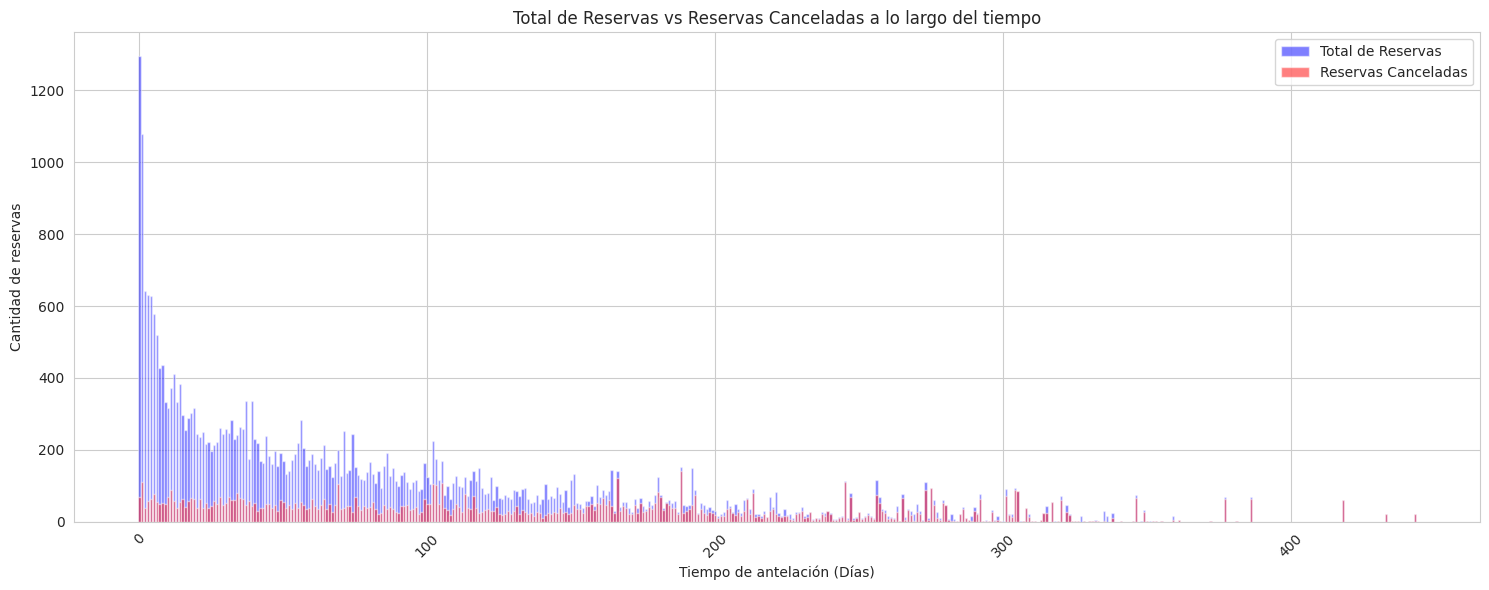

In [ ]:
# Agrupar por tiempo y contar el total de reservas y reservas canceladas
reservas_totales_por_tiempo = df_copia.groupby('lead_time')['booking_status'].count()
reservas_canceladas_por_tiempo = res_cancelada.groupby('lead_time')['booking_status'].count()


# Graficar el histograma
plt.figure(figsize=(15, 6))
plt.bar(reservas_totales_por_tiempo.index, reservas_totales_por_tiempo, color='blue', alpha=0.5, label='Total de Reservas')
plt.bar(reservas_canceladas_por_tiempo.index, reservas_canceladas_por_tiempo, color='red', alpha=0.5, label='Reservas Canceladas')

# Configuraciones del gráfico
plt.title('Total de Reservas vs Reservas Canceladas a lo largo del tiempo')
plt.xlabel('Tiempo de antelación (Días)')
plt.ylabel('Cantidad de reservas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

En el gráfico de arriba vemos en rojo las reservas canceladas y en azul el total de reservas. Creo que en este gráfico es claro, que en el caso de la Hipótesis A, podemos decir que nuestro H0 es correcto, es decir que el tiempo de antelación con el que se hace la reserva influye de manera directa en la cancelación de la misma, a medida que las reservas se hacen mas sobre la fecha del check-in, la cancelación de las mismas no crece de igual forma que las reservas.

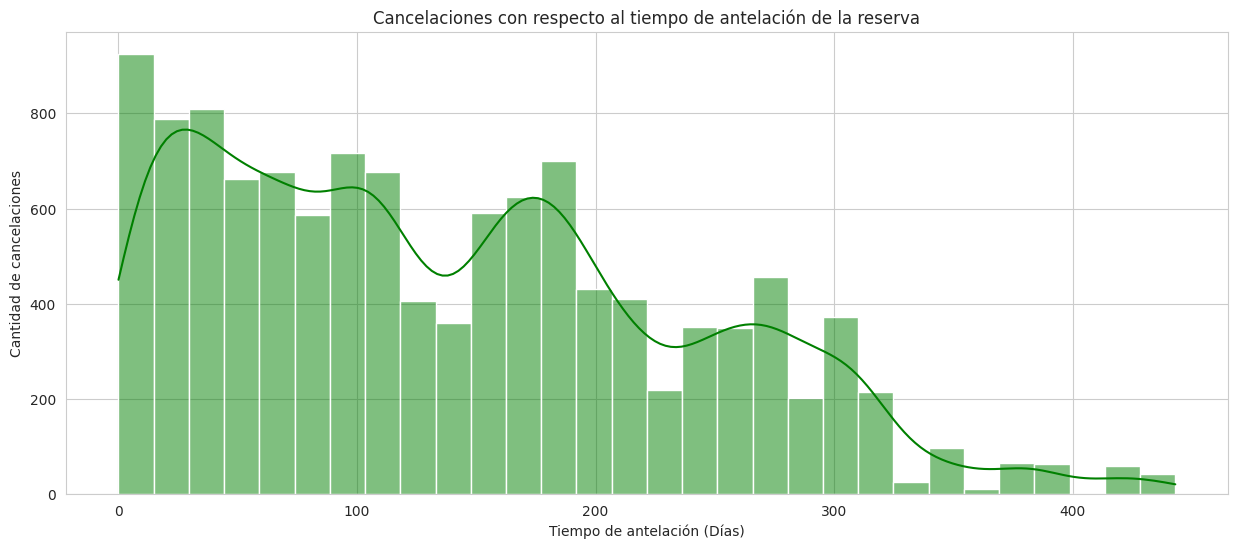

In [ ]:
# Analizar cancelaciones con respecto al tiempo de antelación con el que se hizo la reserva
res_totales = len(df_copia)
lead_time_can = res_cancelada['lead_time'].value_counts().sort_index()

# Grafico
plt.figure(figsize=(15, 6))
sns.histplot(res_cancelada['lead_time'], bins=30, kde=True, color='Green')
plt.title('Cancelaciones con respecto al tiempo de antelación de la reserva')
plt.xlabel('Tiempo de antelación (Días)')
plt.ylabel('Cantidad de cancelaciones')

# Anotación para mostrar la cantidad total de reservas


plt.show()

En el gráfico de arriba vemos la distribución de las reservas canceladas con respecto al tiempo de antelación con el que se hace la reserva.

###3.f.iii- Cancelaciones y Tipo de plan de comidas

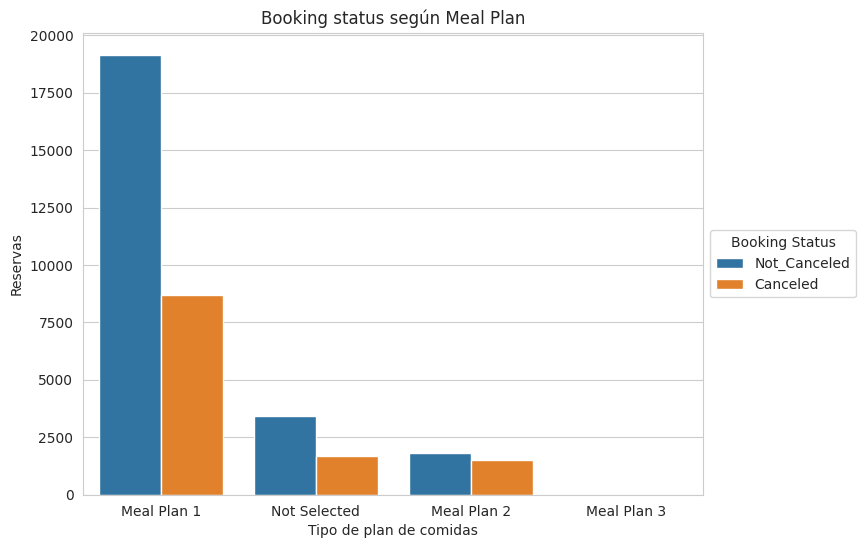

In [ ]:
# Gráfico de cancelaciones según tipo de plan de comidas
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copia, x="type_of_meal_plan", hue="booking_status")
plt.title('Booking status según Meal Plan')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel('Tipo de plan de comidas')
plt.ylabel('Reservas')

plt.show()

En el gráfico que vemos arriba comparamos la cantidad de reservas con la cantidad de cancelaciones según el tipo de plan de comidas seleccionado. En este caso, vemos que más o menos se  mantienen las cancelaciones de forma pareja independientemente del plan de comidas que se seleccionó al reservar. Esto nos lleva a nuestra Hipótesis D, y observamos que nuestro H1 se acerca mas a la realidad, el plan de comidas no influye directamente en la tasa de cancelación.

###3.f.iv- Cancelaciones y Tipo de habitación



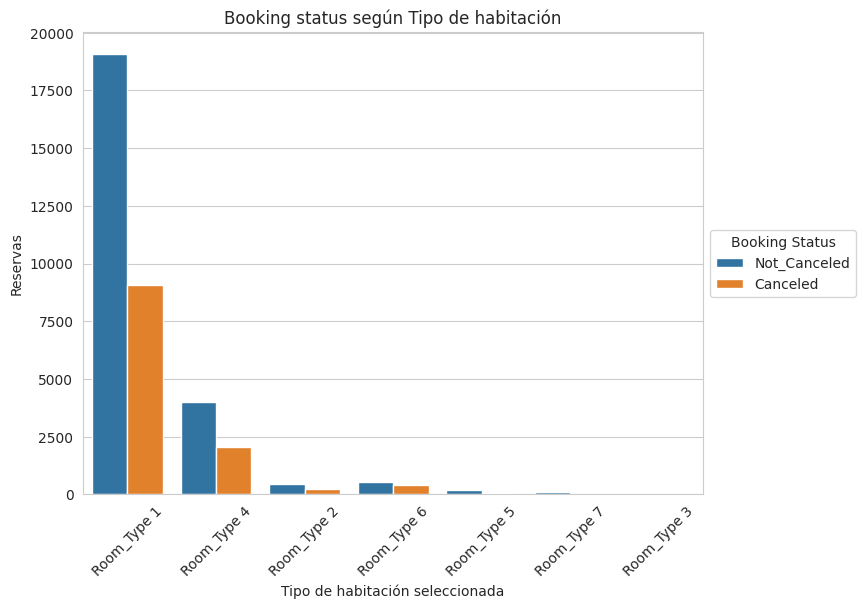

In [ ]:
# Gráfico de cancelaciones según tipo de habitación
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copia, x="room_type_reserved", hue="booking_status")
plt.title('Booking status según Tipo de habitación')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.xlabel('Tipo de habitación seleccionada')
plt.ylabel('Reservas')
plt.show()

El gráfico de barras de arriba nos muesttra la tasa de cancelaciones con respecto al tipo de habitación seleccionado, punto que está relacionado con la Hipótesis B. Aquí vemos que nuestro H1 se acerca mas a lo que vemos, no hay relación directa entre el tipo de habitación seleccionada y la tasa de cancelación.

###3.f.v- Cancelaciones y segmento de mercado

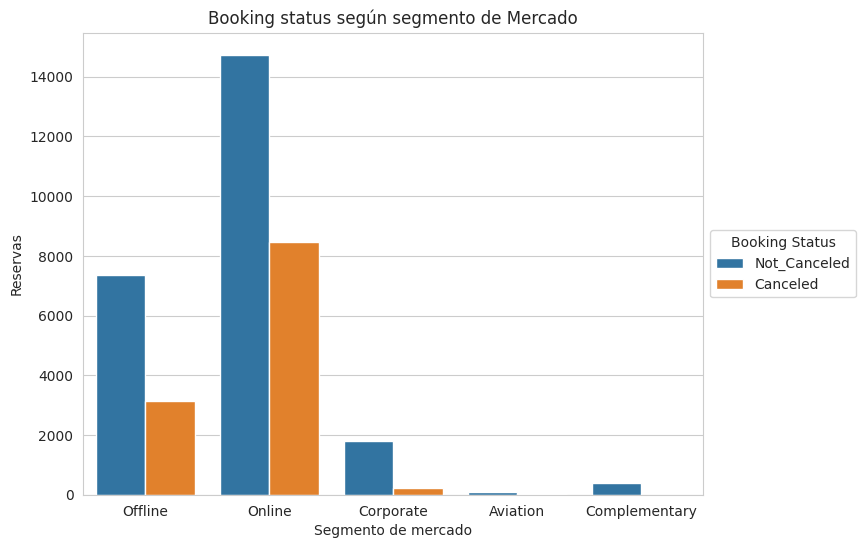

In [ ]:
# Gráfico de cancelaciones según segmento de mercado
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copia, x="market_segment_type", hue="booking_status")
plt.title('Booking status según segmento de Mercado')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel('Segmento de mercado')
plt.ylabel('Reservas')
plt.show()

El gráfico de arriba, si bien no nos muestra una relación directa entre el segmento de Mercado y las cancelaciones, podemos observar que, en el caso de las reservas corporativas, el número de cancelaciones es menor en comparación con el total de reservas. Si pensamos en nuesrtra hipótesis C, no podemos decir que se cumpla ninguno de nuestros supuestos.

###3.f.vi- Cancelaciones en casos de clientes repetidos

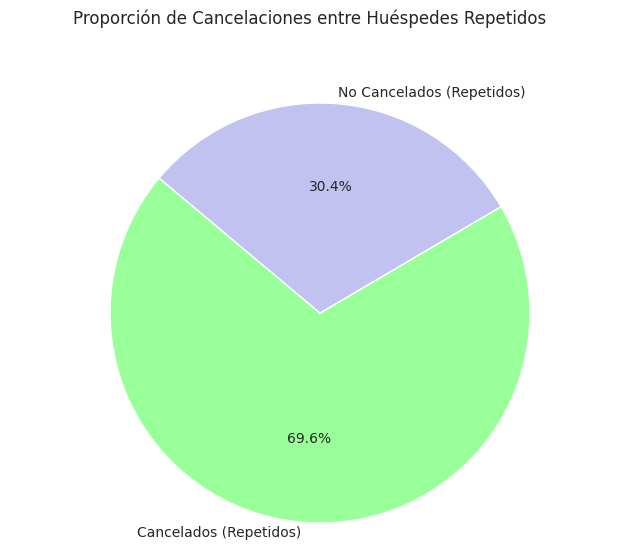

In [ ]:
# Crear gráfico
# Etiquetas
labels = ['Cancelados (Repetidos)', 'No Cancelados (Repetidos)']

# Datos
sizes = [len(cancelados_repetidos), len(no_cancelados_repetidos)]

# Colores
colors = ['#99ff99', '#c2c2f0']

# Crear gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, labeldistance=1.05)

# Título
plt.suptitle('Proporción de Cancelaciones entre Huéspedes Repetidos', y=1)

# Mostrar gráfico
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()

El gráfico de arriba está hecho pensando en nuestra hipótesis E, y vemos que en el caso de los huéspedes que repiten, si ya tienen reservas canceladas con anterioridad es más probable que vuelvan a cancelar, por lo que podemos decir que nuestro H0 es correcto.

###3.f.vii- Cancelaciones en reservas con y sin niños

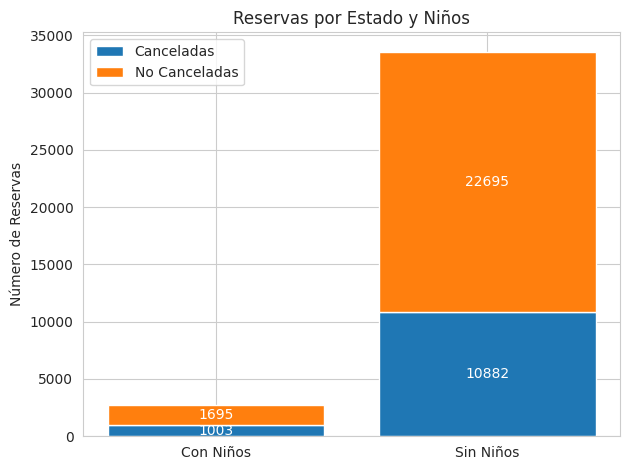

In [ ]:

# Contar el número de reservas canceladas con y sin niños
canceladas_con_ninos = len(canceladas_children)
canceladas_sin_ninos = len(canceladas_sin_children)

# Contar el número total de reservas con y sin niños
total_con_ninos = len(res_children)
total_sin_ninos = len(res_sin_children)

# Calcular el número de reservas no canceladas con y sin niños
no_canceladas_con_ninos = total_con_ninos - canceladas_con_ninos
no_canceladas_sin_ninos = total_sin_ninos - canceladas_sin_ninos

# Crear listas para las alturas de las barras
canceladas = [canceladas_con_ninos, canceladas_sin_ninos]
no_canceladas = [no_canceladas_con_ninos, no_canceladas_sin_ninos]

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Definir las etiquetas de las barras
etiquetas = ['Con Niños', 'Sin Niños']

# Definir la posición de las barras
x = range(len(etiquetas))

# Crear las barras apiladas
ax.bar(x, canceladas, label='Canceladas')
ax.bar(x, no_canceladas, bottom=canceladas, label='No Canceladas')

# Agregar etiquetas de datos
for i in range(len(etiquetas)):
    ax.text(i, canceladas[i] / 2, str(canceladas[i]), ha='center', va='center', color='white')
    ax.text(i, canceladas[i] + no_canceladas[i] / 2, str(no_canceladas[i]), ha='center', va='center', color='white')

# Agregar etiquetas de ejes y título
ax.set_ylabel('Número de Reservas')
ax.set_title('Reservas por Estado y Niños')
ax.set_xticks(x)
ax.set_xticklabels(etiquetas)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Si intentamos responder a la pregunta hecha al inicio  sobre si los clientes con niños cancelan más, el gráfico de arriba nos dice que aunque las reservas en donde hay niños son mucho menores, en comparación no hay una gran diferencia entre la tasa de cancelación de cada una de ellas.
Otra de la preguntas que nos hicimos en un principio fue cuál de los indicadores que tenemos incide de forma directa en las cancelaciones. Como hemos podido observar, no podemos decir que haya una variable que se destaque muy por encima de las otras. Si bien el Lead time y las cancelaciones previas son idicadores de riesgo, no podemos afirmar que incidan de forma aislada en el riesgo de cancelación.

#4-**DATA WRANGLING**
En este caso, como vimos cuando cuando estábamos explorando el dataset (https://colab.research.google.com/drive/1kOOJTjUFIpOQbLNRjAaOtW7rBHhfA6Vn#scrollTo=vsZ7aHUXMB7x&line=2&uniqifier=1), no tenemos nulos. Por lo tanto, lo que nos quedaría sería convertir las columnas que figuran como 'object' a categóricas para así poder aplicar los modelos de machine learning.
Tampoco vemos que crear una columna calculada u otro tratamiento a los datos nos pueda ayudar en este caso, dado que es un dataset especialmente preparado para trabajar con él.

En este apartado vamos a analizar una variable sobre la que no hemos trabajado aún: 'avg_price_per_room' intentando en un principio detectar datos atípicos y también analizar el comportamiento de esta variable con respecto a otras en visualizaciones realizadas con Plotly.



##4.a- Conversión de variables object a category

In [ ]:
# Convierto a category las columnas categóricas

df_copia[['arrival_date', 'arrival_month', 'arrival_year','Booking_ID', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'booking_status']] = df_copia[['arrival_date', 'arrival_month', 'arrival_year','Booking_ID', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'booking_status']].astype('category')

In [ ]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  category
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  category
 10  arrival_month                         36275 non-null  category
 11  ar

Vemos que las varibles quedaron categrizadas tal y como nos parece adecuado.

##4.b- Duplicados

In [ ]:
# Encuentra las filas duplicadas
filas_duplicadas = df_copia[df_copia.duplicated()]

# Imprime las filas duplicadas
print(filas_duplicadas)

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []


Al igual que no tenemos datos nulos, vemos que tampoco tenemos filas duplicadas. El dataset queda como está.

##4.c- Variable Precio


In [ ]:
# Calculamos la min, max, media, varianza, coeficiente de asimetría y kurtosis de la variable 'avg_price_per_room'
precio = df_copia['avg_price_per_room']
scipy.stats.describe(precio)

DescribeResult(nobs=36275, minmax=(0.0, 540.0), mean=103.42353907649897, variance=1231.2676792042057, skewness=0.6671052879080165, kurtosis=3.153524866714438)

Los datos de arriba significan:


*  nobs: Total de observaciones del dataset (36275)
*  minmax: Valor mínimo y máximo de la variable (avg_price_per_room), el mínimo es 0.0 y e máximo es 540
*  mean: Promedio de la variable, 103.42
*  varianza: Esta es la varianza de la variable, que indica qué tan dispersos están los valores de la media. En este caso, la varianza es aproximadamente 1231.27
*  skewness: Esta es una medida de la asimetría de la distribución de la variable. En este caso, el valor de skewness es aproximadamente 0.67, lo que sugiere una ligera asimetría hacia la derecha.
*  kurtosis: Esta es una medida de la forma de la distribución de la variable.  El valor de kurtosis es aproximadamente 3.15, lo que sugiere una distribución leptocúrtica, es decir, una distribución con colas pesadas y un pico más alto que la distribución normal.


In [ ]:
# Calcular el coeficiente de variacion
scipy.stats.variation(precio)

0.3392742183052237


Un coeficiente de variación de 0.3392742183052237 significa que la desviación estándar de los datos es aproximadamente el 33.93% de la media de los datos.

Este valor indica la variabilidad relativa de los datos en relación con su media. Cuanto menor sea el coeficiente de variación, menor será la dispersión de los datos en relación con la media y viceversa. En este caso, un coeficiente de variación de 0.3392742183052237 sugiere una moderada dispersión relativa de los datos en comparación con su media.

In [ ]:
# Creamos un histograma para ver la distribución de 'avg_price_per_room'
df = pd.DataFrame(precio)
fig = px.histogram(df, x='avg_price_per_room', title="Histograma de Precio Promedio por Habitación")

# Actualizar el diseño del gráfico con etiquetas en los ejes x e y
fig.update_layout(
    xaxis_title="Precio Promedio por Habitación",
    yaxis_title="Cantidad de reservas",
)
fig.show()

Aquí vemos gráficamente que la mayoría de los valores se acercan a la media. También observamos que hay reservas cuyo costo es 0, pero no podemos decir que son valores anómalos ya que pueden corresponder a habtaciones de cortesía o problemas ajenos al cliente.

In [ ]:
# Creamos un boxplot para detectar datos atípicos
fig = px.box(df, y='avg_price_per_room', title="Boxplot de Precio Promedio por Habitación")

fig.update_layout(
    yaxis_title="Precio Promedio por Habitación",
 )
fig.show()

Observando los datos obtenidos más arriba, no tenemos gran variación en los datos. Para ver si realmente tenemos datos atípicos, lo ideal sería comparar la varible 'avg_price_per_room' con la varible 'room_type_reserved' para ver la correlación que existe entre las mismas.


In [ ]:
# Contamos la cantidad de reservas por tipo de habitación para poder entender la distribución de las reservas
frecuencia = df_copia['room_type_reserved'].value_counts()
df_frecuencia = pd.DataFrame(frecuencia)
print(df_frecuencia)


                    count
room_type_reserved       
Room_Type 1         28130
Room_Type 4          6057
Room_Type 6           966
Room_Type 2           692
Room_Type 5           265
Room_Type 7           158
Room_Type 3             7


Arriba contamos la cantidad de reservas por tipo de habitación para poder entender la disribución de las reservas por tipo de habitación y luego ver la distribución del precio según el tipo de habitación.

In [ ]:
# Creamos boxplot de precio comparado con tipo de habitación para ver la distribución de estas variables y si realmente tenemos datos atípicos.

categoria_orden = ['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7'] # agregamos para que salga Room type en orden ascendente
fig = px.box(df_copia, x='room_type_reserved', y= 'avg_price_per_room', title="Boxplot de Precio Promedio por Habitación según Tipo de Habitación", color='room_type_reserved', category_orders={'room_type_reserved': categoria_orden})
fig.update_layout(
    xaxis_title="Tipo de Habitación",
    yaxis_title="Precio Promedio por Habitación",
)
fig.show()

Este boxplot nos muestra la distribución del precio por el tipo de habitación.

Con la información aportada en este apartado podemos conluir que la mayoría de las reservas  corresponden al entorno de precio de 100 y al Room_Type_1. Si bien algunos valores pueden ser atípicos por lo escaso de los mismos no creo que sea necesario eliminarlos, porque quizá alguna de las variables que no comparamos en este caso influyen en los mismos.

#5-**PRIMER ACERCAMIENTO A APLICACIÓN DE MODELOS DE MACHINE LEARNING**

In [ ]:
#Duplicamos el df para trabajar en este apartado
df_copy = df_copia

Creamos una copia de la copia en la que hemos trabajdo para utlizar en este nuevo apartado y que los cambios no se aplique al Df en el que venimos refinando hasta ahora.

In [ ]:
#Inicializamos una diccionario para almacenar los resultados de los modelos
resultados_test = {}
resultados_train = {}

En estas dos variables vamos a guardar los resultasdos de las métricas de los modelos para graficar

##5.a- Decision Tree Classifier





In [ ]:
# Utilizamos get.dummies para transformar las variables categóricas múltiples a numéricas
df_copy = pd.get_dummies(df_copy, columns=['room_type_reserved', 'type_of_meal_plan', 'required_car_parking_space', 'market_segment_type'])

# Update X and y
columnas_eliminadas = ['booking_status','Booking_ID', 'arrival_date', 'arrival_month', 'arrival_year']
X = df_copy.drop(columnas_eliminadas, axis=1)
y = df_copy['booking_status']

# Division de training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49150, stratify = y)

# Normalización de variables numéricas price y lead time
scaler = StandardScaler()
X_train[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(X_train[['lead_time', 'avg_price_per_room']])
X_test[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(X_test[['lead_time', 'avg_price_per_room']])

# Crear y entrenar el modelo
model_1 = DecisionTreeClassifier(random_state=49150)
model_1.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred = model_1.predict(X_test)

Aplicamos un primer modelo, Árbol de Decisión.
Para ello seguimos estos pasos:

*   Crear una lista con las columnas que queremos eliminar de nuestro DF
*   En nuestra X colocamos el DF sin las columnas que se eliminaron
*   En nuestra Y colocamos la variable a predecir
*   Dividimos en Training y Testing
*   Escalamos las varibles Lead Time y AVg. Price
*   Creamos y entremos el modelo
*   Predecimos los valores



















In [ ]:
# Calcular métricas de clasificación para testeo
pos_label = "Not_Canceled"

resultados_test[model_1] = {
'accuracy': accuracy_score(y_test, y_pred),
'precision': precision_score(y_test, y_pred, pos_label=pos_label),
'recall': recall_score(y_test, y_pred, pos_label=pos_label),
'f1': f1_score(y_test, y_pred, pos_label=pos_label)
}

y_pred_train = model_1.predict(X_train)

# Calcular métricas de clasificación para training
resultados_train[model_1] = {
'accuracy_train': accuracy_score(y_train, y_pred_train),
'precision_train': precision_score(y_train, y_pred_train, pos_label=pos_label),
'recall_train': recall_score(y_train, y_pred_train, pos_label=pos_label),
'f1_train': f1_score(y_train, y_pred_train, pos_label=pos_label)
}


Calculamos las métricas de clasificación para testing y training y las añadimos a nuestro diccionario

In [ ]:
print (resultados_test)
print (resultados_train)

{DecisionTreeClassifier(random_state=49150): {'accuracy': 0.8366643694004136, 'precision': 0.878458700553392, 'recall': 0.8786387863878639, 'f1': 0.8785487342420826}}
{DecisionTreeClassifier(random_state=49150): {'accuracy_train': 0.9918676774638181, 'precision_train': 0.9939018140821974, 'recall_train': 0.9940036900369004, 'f1_train': 0.9939527494490853}}


Imprimimos las métricas para ver los resultados, decidimos aplicar un Grid Search mas Cross Validation para ver si podemos mejorar el modelo


##5.b- Decision Tree Classifier con Grid Search y Cross Validation



In [ ]:
# Grid Search + Cross Validation
# Definir los parámetros para el Grid Search
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 7, 10, 12],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Crear el modelo de árbol de decisión para usar en Grid Search
modelo = DecisionTreeClassifier(random_state=49150)

# Aplicar Grid Search con Cross Validation
grid_search = GridSearchCV(estimator=modelo, param_grid=grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Usar el mejor modelo encontrado por Grid Search
best_model = grid_search.best_estimator_

# Predecir los valores de prueba
y_pred = best_model.predict(X_test)

Aplicamos Grid Search y Cross Validation para buscar los mejore hiperparámetros para el árbol de clasificación.

In [ ]:
# Imprimir los mejores hiperparámetros
best_hiperparams = grid_search.best_params_
print(f'Los mejores hiperparametros son: {best_hiperparams}')

Los mejores hiperparametros son: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1}


Imprimimos los mejores hiperparámetros para ver cuáles son

In [ ]:
# Conjunto de parametros para probar
params = {
    'ccp_alpha': 0.0,
    'criterion': 'gini',
    'max_depth': 12,
    'max_features': None,
    'max_leaf_nodes': 33,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'min_weight_fraction_leaf': 0.0,
    'splitter': 'best'
}

# Crear y entrenar el modelo
model_2 = DecisionTreeClassifier(**params, random_state=49150)
model_2.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred = model_2.predict(X_test)

Con los mejores hiperparametros volvemos a aplicar el Árbol

In [ ]:
# Calcular métricas de clasificación para testeo
pos_label = "Not_Canceled"

resultados_test[model_2] = {
'accuracy': accuracy_score(y_test, y_pred),
'precision': precision_score(y_test, y_pred, pos_label=pos_label),
'recall': recall_score(y_test, y_pred, pos_label=pos_label),
'f1': f1_score(y_test, y_pred, pos_label=pos_label)
}

y_pred_train = model_2.predict(X_train)

# Calcular métricas de clasificación para training
resultados_train[model_2] = {
'accuracy_train': accuracy_score(y_train, y_pred_train),
'precision_train': precision_score(y_train, y_pred_train, pos_label=pos_label),
'recall_train': recall_score(y_train, y_pred_train, pos_label=pos_label),
'f1_train': f1_score(y_train, y_pred_train, pos_label=pos_label)
}


In [ ]:
print (resultados_test)
print (resultados_train)

{DecisionTreeClassifier(random_state=49150): {'accuracy': 0.8366643694004136, 'precision': 0.878458700553392, 'recall': 0.8786387863878639, 'f1': 0.8785487342420826}, DecisionTreeClassifier(max_depth=12, max_leaf_nodes=33, min_samples_split=10,
                       random_state=49150): {'accuracy': 0.8453480358373535, 'precision': 0.8711462450592885, 'recall': 0.9036490364903649, 'f1': 0.8871000201247735}}
{DecisionTreeClassifier(random_state=49150): {'accuracy_train': 0.9918676774638181, 'precision_train': 0.9939018140821974, 'recall_train': 0.9940036900369004, 'f1_train': 0.9939527494490853}, DecisionTreeClassifier(max_depth=12, max_leaf_nodes=33, min_samples_split=10,
                       random_state=49150): {'accuracy_train': 0.8523087525844245, 'precision_train': 0.8787939098417753, 'recall_train': 0.9051865518655187, 'f1_train': 0.8917950012623076}}


Vuelvo a imprimir las variables con los resultados de las métricas, para ver esto mas claro abajo vamos a crear un gráfico.

##5.c- Decision Tree Clasifier (K-Fold Cross Validation)

In [ ]:
#copiamos dataset
df_copy_K= df_copia

# Utilizamos get.dummies para transformar las variables categóricas múltiples a numéricas
df_copy_K= pd.get_dummies(df_copy_K, columns=['room_type_reserved', 'type_of_meal_plan', 'required_car_parking_space', 'market_segment_type'])

# Update X and y
columnas_eliminadas = ['booking_status','Booking_ID', 'arrival_date', 'arrival_month', 'arrival_year']
X = df_copy_K.drop(columnas_eliminadas, axis=1)
y = df_copy_K['booking_status']

# Division de training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify = y)

# Normalización de variables numéricas price y lead time
scaler = StandardScaler()
X_train[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(X_train[['lead_time', 'avg_price_per_room']])
X_test[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(X_test[['lead_time', 'avg_price_per_room']])

model_K = DecisionTreeClassifier(random_state=49150)
param_space = {
    'max_leaf_nodes': Integer (2, 100),
    'max_depth': Integer(1, 100),
    'min_samples_split': Integer(2, 100),
    'min_samples_leaf': Integer(2, 100),
    'criterion': ['gini', 'entropy', 'log_loss']
}


# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=49150)
bayes_cv_kfold = BayesSearchCV(model_K, param_space, n_iter=50, cv=kfold, scoring='accuracy', random_state=49150)
bayes_cv_kfold.fit(X, y)
mean_score_kfold_0 = bayes_cv_kfold.best_score_
print(f'K-Fold Cross-Validation Accuracy: {mean_score_kfold_0:.4f}')

# Stratified K-Fold Cross-Validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=49150)
bayes_cv_skfold = BayesSearchCV(model_K, param_space, n_iter=50, cv=skfold, scoring='accuracy', random_state=49150)
bayes_cv_skfold.fit(X, y)
mean_score_skfold_1 = bayes_cv_skfold.best_score_
print(f'Stratified K-Fold Cross-Validation Accuracy: {mean_score_skfold_1:.4f}')


K-Fold Cross-Validation Accuracy: 0.8644


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['gini', 100, 100, 2, 2] before, using random point ['log_loss', 48, 19, 11, 72]



Stratified K-Fold Cross-Validation Accuracy: 0.8652


Si bien este bloque lo ejecutamos para este modelo, vemos que hay una mejora en la métrica de Accuracy con respecto a la primera aplicación de Decision Tree a secas y la segunda aplicación con Grid Search y Cross Validation. En pasos posteriores vemos una mejora aún mayor con  la aplicación de métodos de ingeniería de variables.

In [ ]:
# Defino variables para utilizar en  el gráfico
metricas = ["accuracy", "precision", "recall", "f1"]
modelos = [model_1, model_2]
nuevos_modelos_str = ["Decision Tree Classifier", "Decision Tree Classifier with Grid Search"]
colores = ['Gold', 'MediumTurquoise', 'LightGreen', 'LightSeaGreen']

Defino variables para luego poder reutlizarlas en nuevos gráficos.

In [ ]:
traces = []

for i, metrica in enumerate(metricas):
    valores_test = [resultados_test[modelo][metrica] for modelo in modelos]
    valores_train = [resultados_train[modelo][f"{metrica}_train"] for modelo in modelos]

    # Cambia el nombre de las series de barras para incluir la métrica
    trace_test = go.Bar(x=nuevos_modelos_str, y=valores_test, name=f'Test ({metrica})', marker_color=colores[i])
    trace_train = go.Bar(x=nuevos_modelos_str, y=valores_train, name=f'Train ({metrica})', marker_color=colores[i])

    traces.extend([trace_test, trace_train])

# Create subplots for each metric
fig = go.Figure(data=traces)
fig.update_layout(barmode='group', title_text='Métricas por Modelo')
fig.update_xaxes(title_text="Modelos", tickvals=list(range(len(nuevos_modelos_str))), ticktext=nuevos_modelos_str)

fig.show()

CONCLUSIONES:
En el gráfico de arriba observamos que le modelo tiene una mayor diferencia entre train y test en la aplicacón previa al Grid Search, si bien las métricas en entrenamiento son mejores en todos los casos, la diferecia con testing es mayor. En el caso de la aplicacióon del modelo de Árbol de decisión luego de la implemetación del grid search con Cross validation si bien las métricas de enterenamiento bajan un poco, las de testeo se mantienen mas parejas con respecto a las de entrenamiento.

# 6-FEATURE ENGINEERING




##6.a-Canaritos
Agregamos variables con este método para evaluar la importancia de las características en un modelo.

In [ ]:
df_copy1 = df_copia

Creamos una copia para trabajar en el apartado

In [ ]:
# Dividir en X e Y
#volvemos a traer la variable de columnas eliminadas porque falla el entorno de ejecución si no eliminamos estas variables
columnas_eliminadas = ['booking_status','Booking_ID', 'arrival_date', 'arrival_month', 'arrival_year']
X = df_copy1.drop(columnas_eliminadas, axis=1)
y = df_copy1['booking_status']

# Identificar y modificar las variables no numéricas
non_numerical_features = X.select_dtypes(include=["category"]).columns
X = pd.get_dummies(X, columns=non_numerical_features)

# Modificar el PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, include_bias=True)

# Aplicar el método
X_poly = poly.fit_transform(X)
X = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# Generar 50 canaritos (variables con ruido)
np.random.seed(49150)
random_vars = pd.DataFrame(np.random.rand(X.shape[0], 50), columns=[f'random_var_{i}' for i in range(50)])

# Agregar los canaritos a X
X = pd.concat([X, random_vars], axis=1)

# Dividir en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49150)

# Inicializar LGBM
model_3 = LGBMClassifier(n_estimators=100, verbose=-1)

# Ajustar modelo
model_3.fit(X_train, y_train)

LGBMClassifier(verbose=-1)

Aplicamos el método de los canaritos y luego utilizamos un modelo como LGBM que da niveles de importancia a las variables o carcaterísticas, luego vamos a crear un gráfico para ver la importancia de las primeras 30 variables para este modelo.

In [ ]:
#Calcular métricas de clasificación para testeo
pos_label = "Not_Canceled"

resultados_test[model_3] = {
'accuracy': accuracy_score(y_test, y_pred),
'precision': precision_score(y_test, y_pred, pos_label=pos_label),
'recall': recall_score(y_test, y_pred, pos_label=pos_label),
'f1': f1_score(y_test, y_pred, pos_label=pos_label)
}

y_pred_train = model_3.predict(X_train)

# Calcular métricas de clasificación para training
resultados_train[model_3] = {
'accuracy_train': accuracy_score(y_train, y_pred_train),
'precision_train': precision_score(y_train, y_pred_train, pos_label=pos_label),
'recall_train': recall_score(y_train, y_pred_train, pos_label=pos_label),
'f1_train': f1_score(y_train, y_pred_train, pos_label=pos_label)
}


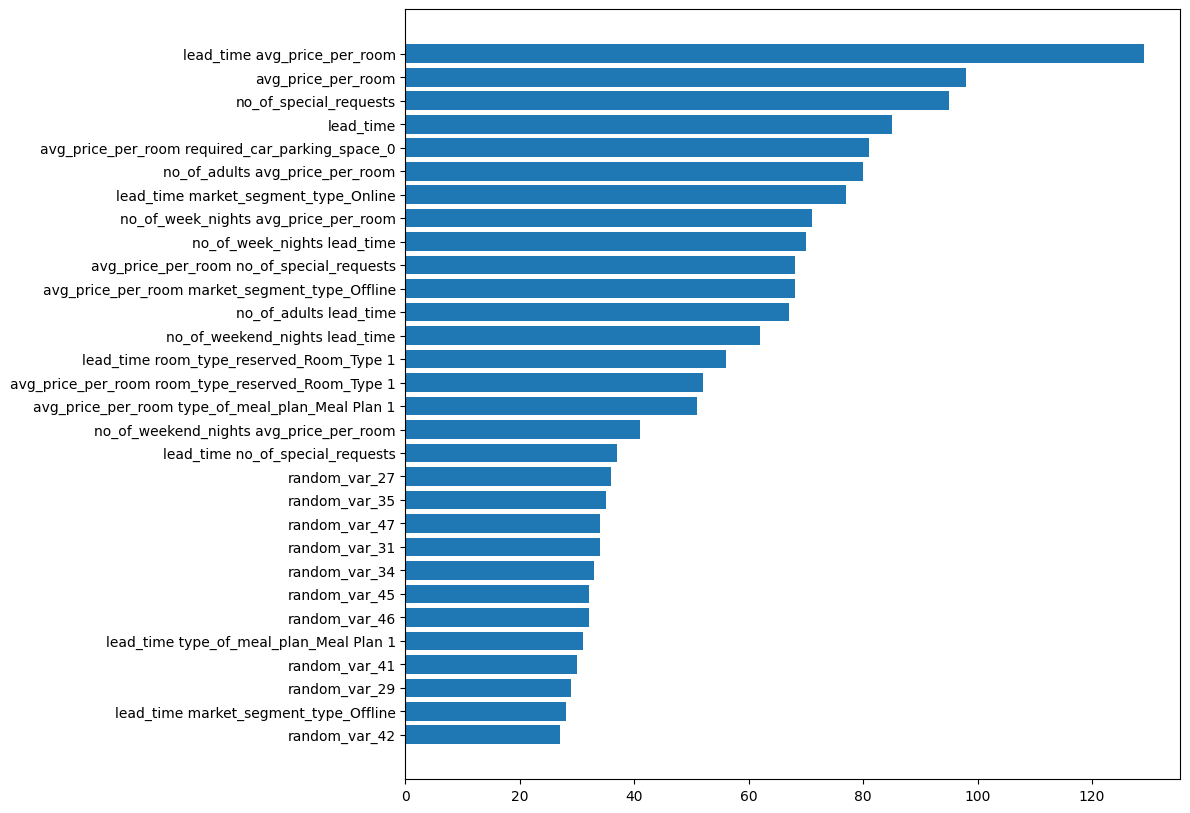

In [ ]:
# Obtener feature importance
feature_importances = pd.DataFrame({'Feature': X.columns,
                                    'Importance': model_3.feature_importances_}).sort_values(by='Importance',
                                                                                          ascending=False)

# Graficar feature importance
plt.figure(figsize=(10,10))
plt.barh(feature_importances['Feature'][:30], feature_importances['Importance'][:30])
plt.gca().invert_yaxis()
plt.show()


Aquí vemos que algunas variables aleatorias muestran una importancia alta, podría ser una señal de alerta sobre la calidad del modelo. Vamos a calcular las métricas para poder analizar los resultados.

In [ ]:
#actualizamos variables para poder graficar métricas
modelos = [model_1, model_2, model_3]
nuevos_modelos_str = ["Decision Tree Classifier", "Decision Tree Classifier with Grid Search", "LGBM Classifier(with PolynomialFeatures applied)"]

In [ ]:
traces = []

for i, metrica in enumerate(metricas):
    valores_test = [resultados_test[modelo][metrica] for modelo in modelos]
    valores_train = [resultados_train[modelo][f"{metrica}_train"] for modelo in modelos]

    # Cambia el nombre de las series de barras para incluir la métrica
    trace_test = go.Bar(x=nuevos_modelos_str, y=valores_test, name=f'Test ({metrica})', marker_color=colores[i])
    trace_train = go.Bar(x=nuevos_modelos_str, y=valores_train, name=f'Train ({metrica})', marker_color=colores[i])

    traces.extend([trace_test, trace_train])

# Create subplots for each metric
fig = go.Figure(data=traces)
fig.update_layout(barmode='group', title_text='Métricas por Modelo')
fig.update_xaxes(title_text="Modelos", tickvals=list(range(len(nuevos_modelos_str))), ticktext=nuevos_modelos_str)

fig.show()

En el gráfico podemos observar que nuestro modelo de LGBM con Canaritos no tiene buenos resultados comparado con los modelos aplicados anteriormente, esto se debe a que no hemos dropeado las columnas que tienen menor importancia.

In [ ]:
# Obtener las importancias de las características y ordenarlas
feature_importances = pd.DataFrame({'Feature': X.columns,
                                    'Importance': model_3.feature_importances_}).sort_values(by='Importance', ascending=False)

# Definir el número de características a mantener
num_features_to_keep = 18

# Seleccionar las principales características
important_features = feature_importances.head(num_features_to_keep)['Feature']

# Filtrar el conjunto de datos original para mantener solo las características importantes
df_copy1_filtered = X[important_features]
df_copy1_filtered['booking_status'] = df_copy1['booking_status']

<ipython-input-31-85b862d9b2a5>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Dropeamos las variables por debajo de la importancia 18, ahí ya vemos que muchas son random vars.

In [ ]:
df_copy1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   lead_time avg_price_per_room                       36275 non-null  float64 
 1   avg_price_per_room                                 36275 non-null  float64 
 2   no_of_special_requests                             36275 non-null  float64 
 3   lead_time                                          36275 non-null  float64 
 4   avg_price_per_room required_car_parking_space_0    36275 non-null  float64 
 5   no_of_adults avg_price_per_room                    36275 non-null  float64 
 6   lead_time market_segment_type_Online               36275 non-null  float64 
 7   no_of_week_nights avg_price_per_room               36275 non-null  float64 
 8   no_of_week_nights lead_time                        36275 non-null  float64 


Vemos la info del dataset con las variables que tuvieron mayor importancia para ver si quedó correcto el filtrado.

In [ ]:
X = df_copy1_filtered
y = df_copy1_filtered['booking_status']

# Division de training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49150, stratify = y)
# Inicializar LGBM
model_4 = LGBMClassifier(n_estimators=100, verbose=-1)

# Ajustar modelo
model_4.fit(X_train, y_train)

LGBMClassifier(verbose=-1)

In [ ]:
#Calcular métricas de clasificación para testeo
pos_label = "Not_Canceled"

resultados_test[model_4] = {
'accuracy': accuracy_score(y_test, y_pred),
'precision': precision_score(y_test, y_pred, pos_label=pos_label),
'recall': recall_score(y_test, y_pred, pos_label=pos_label),
'f1': f1_score(y_test, y_pred, pos_label=pos_label)
}

y_pred_train = model_4.predict(X_train)

# Calcular métricas de clasificación para training
resultados_train[model_4] = {
'accuracy_train': accuracy_score(y_train, y_pred_train),
'precision_train': precision_score(y_train, y_pred_train, pos_label=pos_label),
'recall_train': recall_score(y_train, y_pred_train, pos_label=pos_label),
'f1_train': f1_score(y_train, y_pred_train, pos_label=pos_label)
}


Calculamos métricas para nuevo modelo

In [ ]:
#actualizamos variables para poder graficar métricas
modelos = [model_1, model_2, model_3, model_4]
nuevos_modelos_str = ["Decision Tree Classifier", "Decision Tree Classifier with Grid Search", "LGBM Classifier(with PolynomialFeatures applied)", "LGBM Classifier(with PolynomialFeatures applied)(dropped columns with less importnace)"]

Actualizamos variables para el gráfico

In [ ]:
traces = []

for i, metrica in enumerate(metricas):
    valores_test = [resultados_test[modelo][metrica] for modelo in modelos]
    valores_train = [resultados_train[modelo][f"{metrica}_train"] for modelo in modelos]

    # Cambia el nombre de las series de barras para incluir la métrica
    trace_test = go.Bar(x=nuevos_modelos_str, y=valores_test, name=f'Test ({metrica})', marker_color=colores[i])
    trace_train = go.Bar(x=nuevos_modelos_str, y=valores_train, name=f'Train ({metrica})', marker_color=colores[i])

    traces.extend([trace_test, trace_train])

# Create subplots for each metric
fig = go.Figure(data=traces)
fig.update_layout(barmode='group', title_text='Métricas por Modelo')
fig.update_xaxes(title_text="Modelos", tickvals=list(range(len(nuevos_modelos_str))), ticktext=nuevos_modelos_str)

fig.show()

Vemos que inclusive dropeando las columnas los resultados para test no son tan buenos como los aplicados anteriormente. Por lo tanto decidimos descartar este método para optimizar los modelos. Quizá con valores de training tan cercanos a 1 estamos en u sobreajuste del modelo.

##6.b- Oversampling
En este apartado vamos a modificar el DF para poder obtener mejores resultados en los modelos.






In [ ]:
#copiamos dataset para poder aplicar cambios sin alterar el original
df_copy2 = df_copia

Nuevamente copiamos el dataset original para seguir con las pruebas

In [ ]:
# Utilizamos get.dummies para transformar las variables categóricas múltiples a numéricas
df_copy2 = pd.get_dummies(df_copy2, columns=['room_type_reserved', 'type_of_meal_plan', 'required_car_parking_space', 'market_segment_type'])

# Update X and y
columnas_eliminadas = ['booking_status','Booking_ID', 'arrival_date', 'arrival_month', 'arrival_year']
X = df_copy2.drop(columnas_eliminadas, axis=1)
y = df_copy2['booking_status']

Ajustamos el dataset

In [ ]:
# Ver cantidad de muestras por clase
y.value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

Contamos cuántas muestras tenemos por cada clase

In [ ]:
# Crear el objeto de sobremuestreo
ros = RandomOverSampler(random_state=43)

# Aplicar el sobremuestreo
X_resampled, y_resampled = ros.fit_resample(X, y)

# Verificar el nuevo conteo de clases
print(y_resampled.value_counts())

booking_status
Canceled        24390
Not_Canceled    24390
Name: count, dtype: int64


Hacemos un sobremuestreo de la clase minoritaria para mejorar la sensibilidad del modelo hacia la clase minoritaria ya que nuestro set de datos es de un tamaño realativamente pequeño.

In [ ]:
#guardamos el dataset oversampled para volver a utilizar
df_oversampled = X_resampled.join(y_resampled)
df_oversampled.info()
df_oversampled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48780 entries, 0 to 48779
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          48780 non-null  int64   
 1   no_of_children                        48780 non-null  int64   
 2   no_of_weekend_nights                  48780 non-null  int64   
 3   no_of_week_nights                     48780 non-null  int64   
 4   lead_time                             48780 non-null  int64   
 5   repeated_guest                        48780 non-null  int64   
 6   no_of_previous_cancellations          48780 non-null  int64   
 7   no_of_previous_bookings_not_canceled  48780 non-null  int64   
 8   avg_price_per_room                    48780 non-null  float64 
 9   no_of_special_requests                48780 non-null  int64   
 10  room_type_reserved_Room_Type 1        48780 non-null  bool    
 11  ro

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,...,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,required_car_parking_space_0,required_car_parking_space_1,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,1,2,224,0,0,0,65.00,0,...,False,False,True,False,False,False,False,True,False,Not_Canceled
1,2,0,2,3,5,0,0,0,106.68,1,...,False,True,True,False,False,False,False,False,True,Not_Canceled
2,1,0,2,1,1,0,0,0,60.00,0,...,False,False,True,False,False,False,False,False,True,Canceled
3,2,0,0,2,211,0,0,0,100.00,0,...,False,False,True,False,False,False,False,False,True,Canceled
4,2,0,1,1,48,0,0,0,94.50,0,...,False,True,True,False,False,False,False,False,True,Canceled


Guardamos este dataset oversampleado, lo unimos con un join para usarlo en nuevos modelos

###6.b.i Random Forest Classifier (luego de oversampling)

In [ ]:
# Division de training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify = y)

# Normalización de variables numéricas price y lead time
scaler = StandardScaler()
X_train[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(X_train[['lead_time', 'avg_price_per_room']])
X_test[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(X_test[['lead_time', 'avg_price_per_room']])

In [ ]:
# Crear y entrenar el modelo
model_5 = RandomForestClassifier(random_state=49150)
model_5.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred = model_5.predict(X_test)

Aplicamos nuevo modelo luego del sobremuestreso para ver métricas

In [ ]:
# Calcular métricas de clasificación para testeo
pos_label = "Not_Canceled"

resultados_test[model_5] = {
'accuracy': accuracy_score(y_test, y_pred),
'precision': precision_score(y_test, y_pred, pos_label=pos_label),
'recall': recall_score(y_test, y_pred, pos_label=pos_label),
'f1': f1_score(y_test, y_pred, pos_label=pos_label)
}

y_pred_train = model_5.predict(X_train)

# Calcular métricas de clasificación para training
resultados_train[model_5] = {
'accuracy_train': accuracy_score(y_train, y_pred_train),
'precision_train': precision_score(y_train, y_pred_train, pos_label=pos_label),
'recall_train': recall_score(y_train, y_pred_train, pos_label=pos_label),
'f1_train': f1_score(y_train, y_pred_train, pos_label=pos_label)
}


In [ ]:
#actualizamos variables para poder graficar métricas
modelos = [model_1, model_2, model_3, model_4, model_5]
nuevos_modelos_str = ["Decision Tree Classifier", "Decision Tree Classifier with Grid Search", "LGBM Classifier(with PolynomialFeatures applied)", "LGBM Classifier(with PolynomialFeatures applied)(dropped columns with less importance)", "Random Forest Classifier (Oversampled)"]

In [ ]:
traces = []

for i, metrica in enumerate(metricas):
    valores_test = [resultados_test[modelo][metrica] for modelo in modelos]
    valores_train = [resultados_train[modelo][f"{metrica}_train"] for modelo in modelos]

    # Cambia el nombre de las series de barras para incluir la métrica
    trace_test = go.Bar(x=nuevos_modelos_str, y=valores_test, name=f'Test ({metrica})', marker_color=colores[i])
    trace_train = go.Bar(x=nuevos_modelos_str, y=valores_train, name=f'Train ({metrica})', marker_color=colores[i])

    traces.extend([trace_test, trace_train])

# Create subplots for each metric
fig = go.Figure(data=traces)
fig.update_layout(barmode='group', title_text='Métricas por Modelo')
fig.update_xaxes(title_text="Modelos", tickvals=list(range(len(nuevos_modelos_str))), ticktext=nuevos_modelos_str)

fig.show()

Como podemos ver en los gráficos, los resultados de las métricas del Random Forest Classifier luego de hacer un oversampling de las muestras minoritarias son superiores a los resultados de los modelos aplicados con anterioridad.
Creo que ahora sería necesario probar otros modelos para seguir comparando métricas, de todos modos al igualar la clase minoritaria hemos tenido una mejora, habría también que ver si es posible que este oversampling mejore las predicciones en la aplicación de otros modelos.

In [ ]:
#convertimos los diccionarios a DF para ver en formato tabla
df_resultados_test = pd.DataFrame(resultados_test)
df_resultados_train = pd.DataFrame(resultados_train)

In [ ]:
# Datos
data_1 = df_resultados_test
data_2 = df_resultados_train

# Nombres de columnas
headers = ['Decision Tree Classifier', 'Decision Tree Classifier with Grid Search', "LGBM Classifier(with PolynomialFeatures applied)", "LGBM Classifier(with PolynomialFeatures applied)(dropped columns with less importance)", "Random Forest Classifier (Oversampled)"]

# Mostrar la tabla
print ('Tabla de resultados de Entrenamiento')
print(tabulate(data_2, headers=headers, tablefmt='grid'))
print(' ')
print(' ')
print ('Tabla de resultados de Testeo')
print(tabulate(data_1, headers=headers, tablefmt='grid'))

Tabla de resultados de Entrenamiento
+-----------------+----------------------------+---------------------------------------------+----------------------------------------------------+------------------------------------------------------------------------------------------+------------------------------------------+
|                 |   Decision Tree Classifier |   Decision Tree Classifier with Grid Search |   LGBM Classifier(with PolynomialFeatures applied) |   LGBM Classifier(with PolynomialFeatures applied)(dropped columns with less importance) |   Random Forest Classifier (Oversampled) |
+=================+============================+=============================================+====================================================+==========================================================================================+==========================================+
| accuracy_train  |                   0.991868 |                                    0.852309 |                       

Arriba creamos una tabla sencilla para poder compara los resultados ya que al irse sumando pruebas gráficamente se hace mas complejo ver las diferencias


##6.c- Validación cruzada con optimizadores

En este apartado vamos a repetir el proceso utilizaond validación cruzada con optimizadores

In [ ]:
#volvemos al dataset original
df_copy5 = df_copia

In [ ]:
# Utilizamos get.dummies para transformar las variables categóricas múltiples a numéricas
df_copy5 = pd.get_dummies(df_copy5, columns=['room_type_reserved', 'type_of_meal_plan', 'required_car_parking_space', 'market_segment_type'])

# Update X and y
columnas_eliminadas = ['booking_status','Booking_ID', 'arrival_date', 'arrival_month', 'arrival_year']
X = df_copy5.drop(columnas_eliminadas, axis=1)
y = df_copy5['booking_status']

In [ ]:
# Normalización de variables numéricas price y lead time
scaler = StandardScaler()
X_train[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(X_train[['lead_time', 'avg_price_per_room']])
X_test[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(X_test[['lead_time', 'avg_price_per_room']])

In [ ]:
# Definir el clasificador y el espacio de búsqueda de hiperparámetros
model_6 = DecisionTreeClassifier(random_state=49150)
param_space = {
    'max_leaf_nodes': Integer (2, 100),
    'max_depth': Integer(1, 100),
    'min_samples_split': Integer(2, 100),
    'min_samples_leaf': Integer(2, 100),
    'criterion': ['gini', 'entropy', 'log_loss']
}


# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=49150)
bayes_cv_kfold = BayesSearchCV(model_6, param_space, n_iter=50, cv=kfold, scoring='accuracy', random_state=49150)
bayes_cv_kfold.fit(X, y)
mean_score_kfold_0 = bayes_cv_kfold.best_score_
print(f'K-Fold Cross-Validation Accuracy: {mean_score_kfold_0:.4f}')

# Stratified K-Fold Cross-Validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=49150)
bayes_cv_skfold = BayesSearchCV(model_6, param_space, n_iter=50, cv=skfold, scoring='accuracy', random_state=49150)
bayes_cv_skfold.fit(X, y)
mean_score_skfold_1 = bayes_cv_skfold.best_score_
print(f'Stratified K-Fold Cross-Validation Accuracy: {mean_score_skfold_1:.4f}')


K-Fold Cross-Validation Accuracy: 0.8644


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['gini', 100, 100, 2, 2] before, using random point ['log_loss', 48, 19, 11, 72]



Stratified K-Fold Cross-Validation Accuracy: 0.8652


Luego de evaluar los resultados obtenidos en este apartado, creemos que quizá lo mejor será continuar trabajando con el df_oversampled y volver a probar


In [ ]:
df_copy6 = df_oversampled

In [ ]:
#dado que df_oversampled estaba listo para aplicar los modelos, solo tenemos que actualizar x e y
# Update X and y
X = df_copy6.drop('booking_status', axis=1)
y = df_copy6['booking_status']

In [ ]:
# Definir el clasificador y el espacio de búsqueda de hiperparámetros (mismos
# que anteriores para poder comparar resultados, no apllicamos el stratified ya
# que en este caso no hace falta, tenemos la clase mas qpequeña oversampleada)
model_7 = DecisionTreeClassifier(random_state=49150)
param_space = {
    'max_leaf_nodes': Integer (2, 100),
    'max_depth': Integer(1, 100),
    'min_samples_split': Integer(2, 100),
    'min_samples_leaf': Integer(2, 100),
    'criterion': ['gini', 'entropy', 'log_loss']
}


# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=49150)
bayes_cv_kfold = BayesSearchCV(model_7, param_space, n_iter=50, cv=kfold, scoring='accuracy', random_state=49150)
bayes_cv_kfold.fit(X, y)
mean_score_kfold_2 = bayes_cv_kfold.best_score_
print(f'K-Fold Cross-Validation Accuracy: {mean_score_kfold_2:.4f}')



/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['gini', 58, 100, 2, 2] before, using random point ['entropy', 84, 63, 84, 73]

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['gini', 78, 100, 2, 2] before, using random point ['log_loss', 23, 52, 60, 3]



K-Fold Cross-Validation Accuracy: 0.8430


Por los resultados obtenidos tanto del dataset oversampled como del dataset original, la Validación cruzada con el uso de optimizadores no mejora nuestras métricas, hemos obtenido métricas muy superiores en pasos previos. Por lo tanto de este apartado nos quedamos con nuestro df_oversampled para seguir probando nuevos moldelos


#7-SEGUNDA APLICACIÓN DE MODELOS DE MACHINE LEARNING

En base a lo que veníamos trabajando, vamos a volver a filtrar sets de entreneamiento y testo, volveremos a encodear para asegurarnos que todas las variables estén en los formatos que queremos para entrenar nuestros modelos

In [ ]:
#cargamos dataset
df_copy7 = df_oversampled

#utilizamos labael encoder para la variable booking status
le = LabelEncoder()
df_copy7['booking_status'] = le.fit_transform(df_copy7['booking_status'])

# Update X and y
X = df_copy7.drop('booking_status', axis=1)
y = df_copy7['booking_status']


Preparamos los datos para aplicar modelos de Machine Learniing

In [ ]:
# Definir directorio para guardar los mejores hiperparámetros
directory = '/content/gdrive/MyDrive/Data Science Colab/'

# Función para guardar los mejores hiperparámetros en un archivo JSON
def save_best_params(search, filename):
    best_params = search.best_params_
    with open(os.path.join(directory, filename), 'w') as file:
        json.dump(best_params, file)

# Definir un DataFrame para almacenar las métricas de error
metrics_df = pd.DataFrame()

El código de arriba define una función para guardar los mejores parámetros en archivos Json en nuestro Drive (para no tener que ejecutar los modelos mas de una vez). También creamos un Dataframe para guardar los resultados de las métricas.

Vamos a aplicar nuevos modelos de ML a nuestro df_oversampled y a su vez para  obtener resultados algo mas robustos vamos a implementar el uso de varias semillas. Luego de aplicar el modelo en varias semillas con una búsqueda Bayesiana obtenemos los mejores resultados posibles del modelo, con los parámetros propuestos en las semillas seleccionadas aleatoriamente. Los modelos que aplicaremos con este métodos serán:

*   LightGBM
*   Linear Regression
*   Decision Tree Classifier
*   Random Forest Classifier
*   XGBClassifier

Luego de cada ejecución imprimiremos el Confusion Matrix para evaluar los resultados de cada modelo de forma gráfica.

La matriz de confusión generalmente tiene cuatro entradas, que son: verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN). Los verdaderos positivos representan los casos en que el modelo predijo correctamente la presencia de una clase específica, los falsos positivos representan los casos en que el modelo predijo incorrectamente la presencia de una clase específica, los verdaderos negativos representan los casos en que el modelo predijo correctamente la ausencia de una clase específica y los falsos negativos representan los casos en que el modelo predijo incorrectamente la ausencia de una clase específica.*

*Tomado de: https://gamco.es/glosario/matriz-de-confusion/#:~:text=Una%20matriz%20de%20confusi%C3%B3n%20es,de%20un%20modelo%20de%20clasificaci%C3%B3n.

##7.a-LightGBM con seeding


In [ ]:
# Definir la cantidad de semillas
N = 10
# Generar semillas aleatorias
semillas = [random.randint(0, 10000) for _ in range(N)]
print(f"Semillas aleatorias generadas: {semillas}")

# Lista para almacenar los modelos
model_seeds = []

for semilla in semillas:
    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)

    # Crear el modelo LightGBM para Clasificación
    model_8 = LGBMClassifier(random_state=semilla, verbose=-1)

    # Definir el espacio de búsqueda de hiperparámetros
    espacios = {
        'max_depth': Integer(3, 20),
        'num_leaves': Integer(10, 200),
        'min_child_samples': Integer(5, 100),
        'reg_alpha': Real(0.01, 1.0),
        'reg_lambda': Real(0.01, 1.0)
    }

    # Realizar BayesSearchCV con semillerío
    opt = BayesSearchCV(
        model_8,
        espacios,
        n_iter=20,
        random_state=semilla,
        scoring='accuracy',
        n_jobs=-1,
        cv=5,
        verbose=0
    )

    # Entrenar con la semilla específica
    opt.fit(X_train, y_train)

    # Almacenar el modelo entrenado
    model_seeds.append(opt.best_estimator_)

# Use the best estimator for prediction
best_model_lgbm = opt.best_estimator_ # Get the best model from BayesSearchCV

# Predicción y métricas para la LGBM
y_pred_LGBM_test= best_model_lgbm.predict(X_test) # Use best_model to predict
y_pred_LGBM_train = best_model_lgbm.predict(X_train)
pos_label = 1 #Not_Canceled

metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['LGBM'],
    'Accuracy_Test': [accuracy_score(y_test, y_pred_LGBM_test)],
    'Accuracy_Train': [accuracy_score(y_train, y_pred_LGBM_train)],
    'Precision_Test': [precision_score(y_test, y_pred_LGBM_test, pos_label=pos_label)],
    'Precision_Train': [precision_score(y_train, y_pred_LGBM_train, pos_label=pos_label)],
    'Recall_Test': [recall_score(y_test, y_pred_LGBM_test, pos_label=pos_label)],
    'Recall_Train': [recall_score(y_train, y_pred_LGBM_train, pos_label=pos_label)],
    'F1_Test': [f1_score(y_test, y_pred_LGBM_test, pos_label=pos_label)],
    'F1_Train': [f1_score(y_train, y_pred_LGBM_train, pos_label=pos_label)],
    'Semilla': [semillas]
})])

# Guardar los mejores hiperparámetros en un archivo JSON
save_best_params(opt, 'best_params_LGBM.json')


Semillas aleatorias generadas: [5456, 3043, 6672, 6456, 9346, 4513, 4637, 7985, 7335, 5503]


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Aplicamos el modelo con una búsqueda bayesiana, guardamos los mejores parámetros y sumamos a nuestro metrics_df los resultados de las métricas de entrenamiento y de testeo.

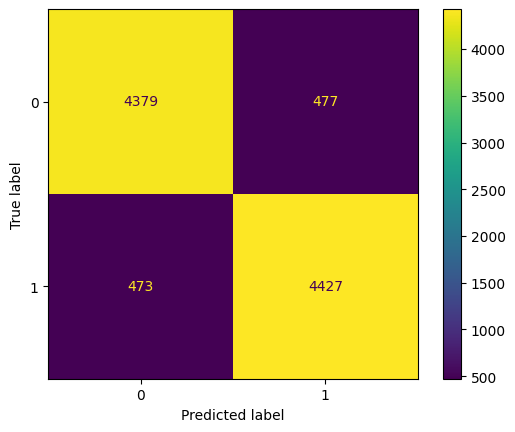

In [ ]:
cm = confusion_matrix(y_test, y_pred_LGBM_test, labels=opt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=opt.classes_)
disp.plot()

plt.show()

Este Confusion Matrix será la base para ir comparando con los siguientes modelos, tenemos una tasa de error tanto en falsos positivos como en falsos negativos en el entorno del 10%

##7.b-Logistic Regression con seeding

In [ ]:
# Definir la cantidad de semillas
N = 5
# Generar semillas aleatorias
semillas = [random.randint(0, 10000) for _ in range(N)]
print(f"Semillas aleatorias generadas: {semillas}")

# Lista para almacenar los modelos
model_seeds = []

for semilla in semillas:
    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)

    # Crear el modelo Logistic Regression
    model_9 = LogisticRegression(random_state=semilla)

    # Definir el espacio de búsqueda de hiperparámetros
    espacios = {
        'penalty': Categorical(['l2', 'none']), # Norma usada en la penalización (solo l2 o none en lbfgs)
        'solver': Categorical(['lbfgs', 'saga']), # Algoritmo de optimización a usar
        'max_iter': Integer(50, 100) # Número máximo de iteraciones
    }

    # Realizar BayesSearchCV con semillerío
    opt = BayesSearchCV(
        model_9,
        espacios,
        n_iter=20,
        random_state=semilla,
        scoring='accuracy',
        n_jobs=-1,
        cv=5,
        verbose=0
  )

    # Entrenar con la semilla específica
    opt.fit(X_train, y_train)

    # Almacenar el modelo entrenado
    model_seeds.append(opt.best_estimator_)

# Use the best estimator for prediction
best_model_LogisticR = opt.best_estimator_ # Get the best model from BayesSearchCV

# Predicción y métricas para la Logidtic Regression
y_pred_LogisticR_test= best_model_LogisticR.predict(X_test) # Use best_model to predict
y_pred_LogisticR_train = best_model_LogisticR.predict(X_train)
pos_label = 1 #Not_Canceled

metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['Logistic_Regression'],
    'Accuracy_Test': [accuracy_score(y_test, y_pred_LogisticR_test)],
    'Accuracy_Train': [accuracy_score(y_train, y_pred_LogisticR_train)],
    'Precision_Test': [precision_score(y_test, y_pred_LogisticR_test, pos_label=pos_label)],
    'Precision_Train': [precision_score(y_train, y_pred_LogisticR_train, pos_label=pos_label)],
    'Recall_Test': [recall_score(y_test, y_pred_LogisticR_test, pos_label=pos_label)],
    'Recall_Train': [recall_score(y_train, y_pred_LogisticR_train, pos_label=pos_label)],
    'F1_Test': [f1_score(y_test, y_pred_LogisticR_test, pos_label=pos_label)],
    'F1_Train': [f1_score(y_train, y_pred_LogisticR_train, pos_label=pos_label)],
    'Semilla': [semillas]
})])

# Guardar los mejores hiperparámetros en un archivo JSON
save_best_params(opt, 'best_params_LogisticR.json')


Semillas aleatorias generadas: [5209, 3369, 8066, 1635, 7103]


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Aplicamos el modelo con una búsqueda bayesiana, guardamos los mejores parámetros y sumamos a nuestro metrics_df los resultados de las métricas de entrenamiento y de testeo.

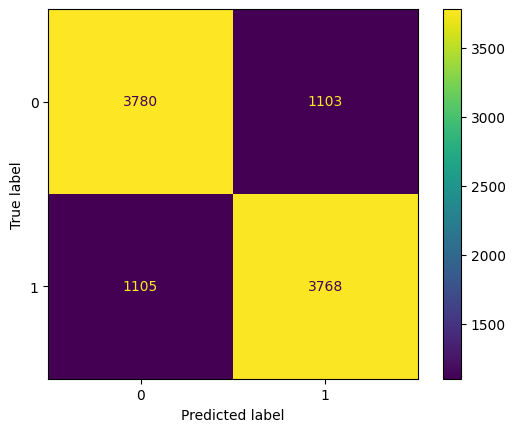

In [ ]:
cm = confusion_matrix(y_test, y_pred_LogisticR_test, labels=opt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=opt.classes_)
disp.plot()

plt.show()

Si comparamos este gráfico con el anterior vemos una notable diferencia, ya vemos que el resultado es bastante inferior al anterior.

##7.c-Decision Tree Classifier con seeding

In [ ]:
# Definir la cantidad de semillas
N = 5
# Generar semillas aleatorias
semillas = [random.randint(0, 10000) for _ in range(N)]
print(f"Semillas aleatorias generadas: {semillas}")

# Lista para almacenar los modelos
model_seeds = []

for semilla in semillas:
    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)

    # Crear el modelo Decision Tree Classifier
    model_10 = DecisionTreeClassifier(random_state=semilla)

    # Definir el espacio de búsqueda de hiperparámetros
    espacios = {
        'max_depth': Integer(1, 20),
        'min_samples_split': Integer(2, 10),
        'min_samples_leaf': Integer(1, 10),
        'criterion': Categorical(['gini', 'entropy'])
    }

    # Realizar BayesSearchCV con semillerío
    opt = BayesSearchCV(
        model_10,
        espacios,
        n_iter=20,
        random_state=semilla,
        scoring='accuracy',
        n_jobs=-1,
        cv=5,
        verbose=0
  )

    # Entrenar con la semilla específica
    opt.fit(X_train, y_train)

    # Almacenar el modelo entrenado
    model_seeds.append(opt.best_estimator_)

# Use the best estimator for prediction
best_model_DecisionTree = opt.best_estimator_ # Get the best model from BayesSearchCV

# Predicción y métricas para Decission TRee Classifier
y_pred_DecisionTree_test= best_model_DecisionTree.predict(X_test) # Use best_model to predict
y_pred_DecisionTree_train = best_model_DecisionTree.predict(X_train)
pos_label = 1 #Not_Canceled

metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['D_Treee_Clasifier'],
    'Accuracy_Test': [accuracy_score(y_test, y_pred_DecisionTree_test)],
    'Accuracy_Train': [accuracy_score(y_train, y_pred_DecisionTree_train)],
    'Precision_Test': [precision_score(y_test, y_pred_DecisionTree_test, pos_label=pos_label)],
    'Precision_Train': [precision_score(y_train, y_pred_DecisionTree_train, pos_label=pos_label)],
    'Recall_Test': [recall_score(y_test, y_pred_DecisionTree_test, pos_label=pos_label)],
    'Recall_Train': [recall_score(y_train, y_pred_DecisionTree_train, pos_label=pos_label)],
    'F1_Test': [f1_score(y_test, y_pred_DecisionTree_test, pos_label=pos_label)],
    'F1_Train': [f1_score(y_train, y_pred_DecisionTree_train, pos_label=pos_label)],
    'Semilla': [semillas]
  })])

# Guardar los mejores hiperparámetros en un archivo JSON
save_best_params(opt, 'best_params_DecisionTree.json')


Semillas aleatorias generadas: [2427, 8923, 6779, 8273, 8958]


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Aplicamos el modelo con una búsqueda bayesiana, guardamos los mejores parámetros y sumamos a nuestro metrics_df los resultados de las métricas de entrenamiento y de testeo.

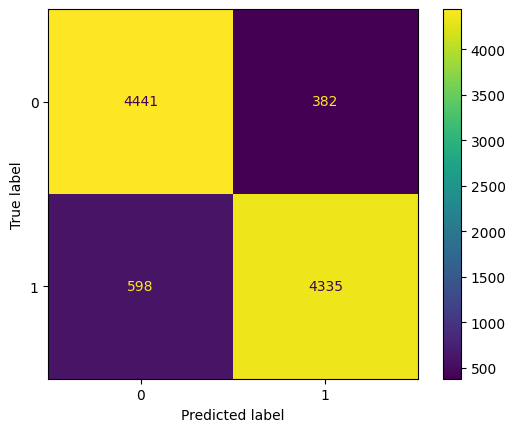

In [ ]:
cm = confusion_matrix(y_test, y_pred_DecisionTree_test, labels=opt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=opt.classes_)
disp.plot()

plt.show()

En este CM vemos que los resultados con respecto al Falso negativo son superiores pero inferiores con respecto al Falso positivo de LGBM

##7.c-Random Forest **Classifier** con seeding

In [ ]:
# Definir la cantidad de semillas
N = 5
# Generar semillas aleatorias
semillas = [random.randint(0, 10000) for _ in range(N)]
print(f"Semillas aleatorias generadas: {semillas}")

# Lista para almacenar los modelos
model_seeds = []

for semilla in semillas:
    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)

    # Crear el modelo Random Forest Classifier para Clasificación
    model_11 = RandomForestClassifier(random_state=semilla)

    # Definir el espacio de búsqueda de hiperparámetros
    espacios = {
        'n_estimators': Integer(10, 20),
        'max_depth': Integer(1, 20),
        'min_samples_split': Integer(2, 10),
        'min_samples_leaf': Integer(1, 10),
        'max_features': Categorical(['auto', 'sqrt', 'log2']),
        'bootstrap': Categorical([True, False])
    }

    # Realizar BayesSearchCV con semillerío
    opt = BayesSearchCV(
        model_11,
        espacios,
        n_iter=20,
        random_state=semilla,
        scoring='accuracy',
        n_jobs=-1,
        cv=5,
        verbose=0
  )

    # Entrenar con la semilla específica
    opt.fit(X_train, y_train)

    # Almacenar el modelo entrenado
    model_seeds.append(opt.best_estimator_)

# Use the best estimator for prediction
best_model_RandomF = opt.best_estimator_ # Get the best model from BayesSearchCV

# Predicción y métricas para la Random Forest
y_pred_RandomF_test= best_model_RandomF.predict(X_test) # Use best_model to predict
y_pred_RandomF_train = best_model_RandomF.predict(X_train)
pos_label = 1 #Not_Canceled

metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy_Test': [accuracy_score(y_test, y_pred_RandomF_test)],
    'Accuracy_Train': [accuracy_score(y_train, y_pred_RandomF_train)],
    'Precision_Test': [precision_score(y_test, y_pred_RandomF_test, pos_label=pos_label)],
    'Precision_Train': [precision_score(y_train, y_pred_RandomF_train, pos_label=pos_label)],
    'Recall_Test': [recall_score(y_test, y_pred_RandomF_test, pos_label=pos_label)],
    'Recall_Train': [recall_score(y_train, y_pred_RandomF_train, pos_label=pos_label)],
    'F1_Test': [f1_score(y_test, y_pred_RandomF_test, pos_label=pos_label)],
    'F1_Train': [f1_score(y_train, y_pred_RandomF_train, pos_label=pos_label)],
    'Semilla': [semillas]
})])

# Guardar los mejores hiperparámetros en un archivo JSON
save_best_params(opt, 'best_params_RandomF.json')

Semillas aleatorias generadas: [7676, 5493, 2694, 1993, 4008]


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 20, 'auto', 1, 2, 20] before, using random point [True, 20, 'auto', 6, 2, 10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 20, 'auto', 1, 2, 20]

Aplicamos el modelo con una búsqueda bayesiana, guardamos los mejores parámetros y sumamos a nuestro metrics_df los resultados de las métricas de entrenamiento y de testeo.

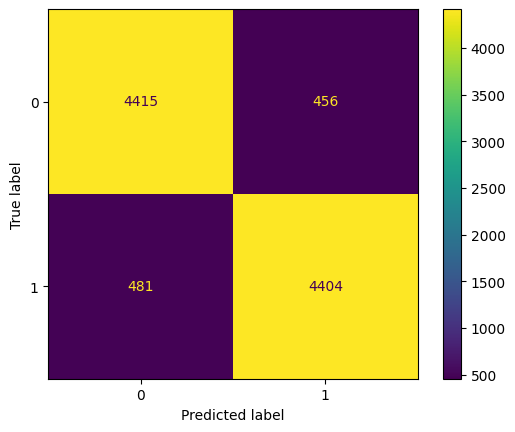

In [ ]:
cm = confusion_matrix(y_test, y_pred_RandomF_test, labels=opt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=opt.classes_)
disp.plot()

plt.show()

En este caso vemos resultados similares (algo inferiores) con respecto a los resultados de LGBM y Decision Treee Classifier

##7.d-XGBClassifier con seeding




In [ ]:
# Definir la cantidad de semillas
N = 5
# Generar semillas aleatorias
semillas = [random.randint(0, 10000) for _ in range(N)]
print(f"Semillas aleatorias generadas: {semillas}")

# Lista para almacenar los modelos
model_seeds = []

for semilla in semillas:
    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)

    # Crear el modelo XGBClassifier para Clasificación
    model_12 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

    # Definir el espacio de búsqueda de hiperparámetros
    espacios = {
        'n_estimators': Integer(50, 100),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.6, 1.0),
        'gamma': Real(0, 5),
  }

    # Realizar BayesSearchCV con semillerío
    opt = BayesSearchCV(
        model_12,
        espacios,
        n_iter=20,
        random_state=semilla,
        scoring='accuracy',
        n_jobs=-1,
        cv=5,
        verbose=0
  )

    # Entrenar con la semilla específica
    opt.fit(X_train, y_train)

    # Almacenar el modelo entrenado
    model_seeds.append(opt.best_estimator_)

# Use the best estimator for prediction
best_model_XGB= opt.best_estimator_ # Get the best model from BayesSearchCV

# Predicción y métricas para la XGB
y_pred_XGB_test= best_model_XGB.predict(X_test) # Use best_model to predict
y_pred_XGB_train = best_model_XGB.predict(X_train)
pos_label = 1 #Not_Canceled

metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['XGBClassifier'],
    'Accuracy_Test': [accuracy_score(y_test, y_pred_XGB_test)],
    'Accuracy_Train': [accuracy_score(y_train, y_pred_XGB_train)],
    'Precision_Test': [precision_score(y_test, y_pred_XGB_test, pos_label=pos_label)],
    'Precision_Train': [precision_score(y_train, y_pred_XGB_train, pos_label=pos_label)],
    'Recall_Test': [recall_score(y_test, y_pred_XGB_test, pos_label=pos_label)],
    'Recall_Train': [recall_score(y_train, y_pred_XGB_train, pos_label=pos_label)],
    'F1_Test': [f1_score(y_test, y_pred_XGB_test, pos_label=pos_label)],
    'F1_Train': [f1_score(y_train, y_pred_XGB_train, pos_label=pos_label)],
    'Semilla': [semillas]
})])

# Guardar los mejores hiperparámetros en un archivo JSON
save_best_params(opt, 'best_params_XGB.json')

Semillas aleatorias generadas: [1546, 2826, 4108, 1386, 51]


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Aplicamos el modelo con una búsqueda bayesiana, guardamos los mejores parámetros y sumamos a nuestro metrics_df los resultados de las métricas de entrenamiento y de testeo.

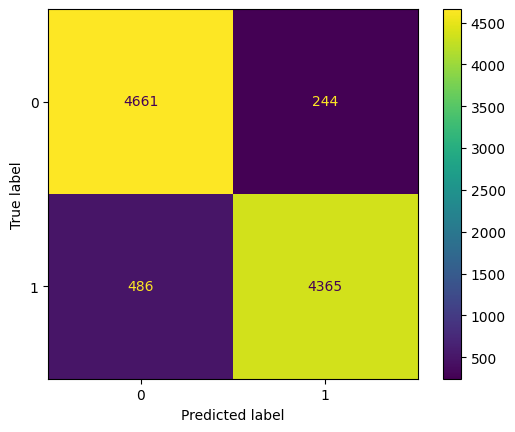

In [ ]:
cm = confusion_matrix(y_test, y_pred_XGB_test, labels=opt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=opt.classes_)
disp.plot()

plt.show()

En este caso el CM nos muestra inclusive mejores resultados en cuanto a los Falsos Positivos de todos los modelos aplicados y algo inferiores con respecto a los falsos negativos. Sería necesario comparar métricas para poder evaluar los resultados de forma mas certera.

#8-EVALUACIÓN DE MÉTRICAS

En este apartado vamos a crar una tabla y diferentes gráficos para poder evaluar las métricas de los modelos de Machine Learning aplicados en el apartado 7.

In [ ]:
# Definir la ruta donde se guardará el archivo en Google Drive
file_path = '/content/gdrive/MyDrive/Data Science Colab/metrics_df.csv'

# Guardar el DataFrame como un archivo CSV en Google Drive
metrics_df.to_csv(file_path, index=False)

Guardamos el metrics_df en nuestro drive para tener el registro y poder reutilizarlo

In [ ]:
#quitar la columna semilla porque no aporta a la evaluación
metrics_df = metrics_df.drop(columns=['Semilla'])

Quitamos la columna semillas del DF, no aporta en este caso a la evaluación de las métricas

In [ ]:
# Crear la tabla con plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(metrics_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[metrics_df[col] for col in metrics_df.columns],
               fill_color='lavender',
               align='left'))
  ])

# Mostrar la tabla
fig.show()


Cramos una tabla para poder ver todas las métricas juntas en la misma representación, como habíamos adelantado cuando analizamos cada CM por separado, los resultados del XGB son superiores en casi todas las métricas analizadas, seguido de LGBM y de Random Forest y Decission Tree casi a la par. Decidimos entonces probar un stacking de estos modelos para ver si de esta forma es posible mejorar los resultados.

##8.b-Stacking de modelos

In [ ]:
# Definir los modelos base con los mejores hiperparámetros encontrados
base_learners = [
    ('XGB', best_model_XGB),
    ('lgbm', best_model_lgbm),
    ('tree', best_model_DecisionTree)
]
# Definir el modelo meta
meta_learner = RandomForestClassifier(random_state=49150)


# Crear el modelo de stacking
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Entrenar el modelo de stacking
stacking_model.fit(X_train, y_train)

# Hacer predicción
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

# Calcular y mostrar las precisiones de entrenamiento y prueba
y_pred_stacking_train = stacking_model.predict(X_train)
y_pred_stacking_test = stacking_model.predict(X_test)
pos_label = 1 #Not_Canceled

metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['Stacking'],
    'Accuracy_Test': [accuracy_score(y_test, y_pred_stacking_test)],
    'Accuracy_Train': [accuracy_score(y_train, y_pred_stacking_train)],
    'Precision_Test': [precision_score(y_test, y_pred_stacking_test, pos_label=pos_label)],
    'Precision_Train': [precision_score(y_train, y_pred_stacking_train, pos_label=pos_label)],
    'Recall_Test': [recall_score(y_test, y_pred_stacking_test, pos_label=pos_label)],
    'Recall_Train': [recall_score(y_train, y_pred_stacking_train, pos_label=pos_label)],
    'F1_Test': [f1_score(y_test, y_pred_stacking_test, pos_label=pos_label)],
    'F1_Train': [f1_score(y_train, y_pred_stacking_train, pos_label=pos_label)],
})])





Aplicamos el modelo de stacking utilizando los mejores modelos que ya teníamos guardados y como metamodel utilizamos Random Forest de forma genérica, utilizando la semilla 49150. Sumamos a nuestro metrics_df los resultados de las métricas de entrenamiento y de testeo.

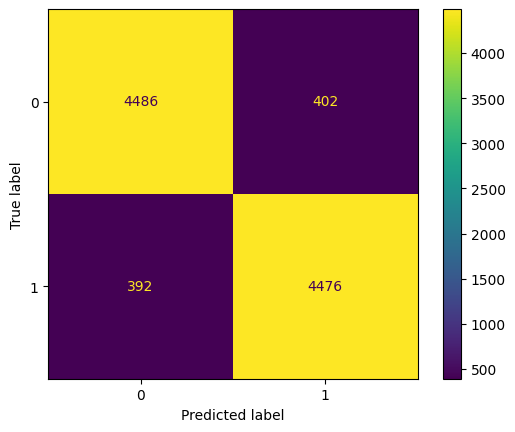

In [ ]:
cm = confusion_matrix(y_test, y_pred_stacking_test, labels=stacking_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=stacking_model.classes_)
disp.plot()

plt.show()

En este caso obtuvimos resultados similares a los anteriores, es encesario evaular nuevamente todos los resultados para poder encontrar el mejor modelo.

#9-CONCLUSIONES

Antes de poder llegar a conclusiones es necesario evaluar las métricas de todos los modelos y ver realmente cuál es el que mejor se ajusta a nuestros datos. Vamos a mostrar un gráfico por cada métrica y así poder evaluar visuamente los resultados.

In [ ]:
# Crear figura de plotly
fig = go.Figure()

# Agregar líneas para las métricas de test y train
fig.add_trace(go.Scatter(x=metrics_df['Model'], y=metrics_df['Accuracy_Test'], mode='lines+markers', name='Accuracy Test'))
fig.add_trace(go.Scatter(x=metrics_df['Model'], y=metrics_df['Accuracy_Train'], mode='lines+markers', name='Accuracy Train'))

# Configurar diseño del gráfico
fig.update_layout(title='Accuracy Comparison (Test vs Train)',
                  xaxis_title='Model',
                  yaxis_title='Accuracy',
                  xaxis_tickangle=-45)

# Mostrar el gráfico
fig.show()

En cuanto a Accuracy vemos que XGB es el modelo que mejor ajusta en testeo y entrenamiento.

In [ ]:
# Crear figura de plotly
fig = go.Figure()

# Agregar líneas para las métricas de test y train
fig.add_trace(go.Scatter(x=metrics_df['Model'], y=metrics_df['Precision_Test'], mode='lines+markers', name='Precision Test'))
fig.add_trace(go.Scatter(x=metrics_df['Model'], y=metrics_df['Precision_Train'], mode='lines+markers', name='Precision Train'))

# Configurar diseño del gráfico
fig.update_layout(title='Precision Comparison (Test vs Train)',
                  xaxis_title='Model',
                  yaxis_title='Precision',
                  xaxis_tickangle=-45)

# Mostrar el gráfico
fig.show()

En cuanto a Precision vemos que XGB es el modelo que mejor ajusta en testeo y entrenamiento.

In [ ]:
# Crear figura de plotly
fig = go.Figure()

# Agregar líneas para las métricas de test y train
fig.add_trace(go.Scatter(x=metrics_df['Model'], y=metrics_df['Recall_Test'], mode='lines+markers', name='Recall Test'))
fig.add_trace(go.Scatter(x=metrics_df['Model'], y=metrics_df['Recall_Train'], mode='lines+markers', name='Recall Train'))

# Configurar diseño del gráfico
fig.update_layout(title='Recall Comparison (Test vs Train)',
                  xaxis_title='Model',
                  yaxis_title='Recall',
                  xaxis_tickangle=-45)

# Mostrar el gráfico
fig.show()

En cuanto a Accuracy vemos que XGB es el modelo que mejor ajusta en  entrenamiento, pero en testeo LGBM es ligeramente superior.

In [ ]:
# Crear figura de plotly
fig = go.Figure()

# Agregar líneas para las métricas de test y train
fig.add_trace(go.Scatter(x=metrics_df['Model'], y=metrics_df['F1_Test'], mode='lines+markers', name='F1 Test'))
fig.add_trace(go.Scatter(x=metrics_df['Model'], y=metrics_df['F1_Train'], mode='lines+markers', name='F1 Train'))

# Configurar diseño del gráfico
fig.update_layout(title='F1 Comparison (Test vs Train)',
                  xaxis_title='Model',
                  yaxis_title='F1',
                  xaxis_tickangle=-45)

# Mostrar el gráfico
fig.show()

En cuanto a F1 vemos que XGB es el modelo que mejor ajusta en testeo y entrenamiento.

In [ ]:
# Crear la tabla con plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(metrics_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[metrics_df[col] for col in metrics_df.columns],
               fill_color='lavender',
               align='left'))
  ])

# Mostrar la tabla
fig.show()

**Conclusiones:** Luego de visualizar los gráficos por cada métrica y la tabla nuevamente donde reflejamos todos los resultados de las mismas, el mejor modelo que hemos obtenido es XGB Classifier seguido muy de cerca del Stacking de modelos. Cualquiera de ellos, por las escasas deferencias en los resultados, serían de utilidad para poder predecir las posibles cancelaciones en las reservas. Ya con estos datos el cliente podría tomar las decisiones necesarias para evitar las pérdidas generadas por las reservas canceladas.


#10-CONSIDERACIONES FINALES

Es necesario para concluir enumerar algunos de las posibilidades que vemos para poder mejorar aún mas los resultados:


*   Utilizar modelos de series de tiempo, en todos los casos las fechas no las hemos tomado en cuenta para los modelos
*   Trabajar mas con la ingeniería de variables, solo probamos canaritos o oversampling, quizá con otros métodos (permutation_imprtance, etc) podríamos haber logrado mejores resultados
*   Ampliar los parámetros de las búsquedas bayesianas en la aplicación de los modelos, aquí nos encontramos con problemas de tiempo y de limitaciones con Colab que luego de cierto tiempo de inactividad se interrumpía la ejecución, etc.
*   Aplicar modelos de redes neuronales y otros modelos que quizá podrían haber arrojado mejores resultados



